# DATA ANALYSIS PROJECT

 Defining the Problem Statement 

|| Importing Data Aand Required Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('C:\\Users\\rahul\\OneDrive\\Desktop\\Project_DA.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2/6/2015 22:24,2/6/2015 23:27,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,1/22/2015 20:39,1/22/2015 21:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2/3/2015 21:21,2/3/2015 22:13,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2/15/2015 2:40,2/15/2015 3:20,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [5]:
df.tail()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
197423,1.0,2/17/2015 0:19,2/17/2015 1:24,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2/13/2015 0:01,2/13/2015 0:58,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,1/24/2015 4:46,1/24/2015 5:36,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2/1/2015 18:18,2/1/2015 19:23,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0
197427,1.0,2/8/2015 19:24,2/8/2015 20:01,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,4,2605,4,425,750,20.0,20.0,23.0


In [6]:
df.shape         # Total No. of Rows and Columns

(197428, 14)

In [7]:
df.dtypes              # Datatypes of Data

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

In [8]:
df.describe()     # Stats Description of Data

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


 # Data Cleaning

Detecting and Handling Outliers

In [9]:
# Target outliers

# subtotal
#'total_items'
#'min_item_price'
# max_item_price
#'total_onshift_partners'
#'total_busy_partners'
#'total_outstanding_orders'


Text(0.5, 1.0, 'Subtotal')

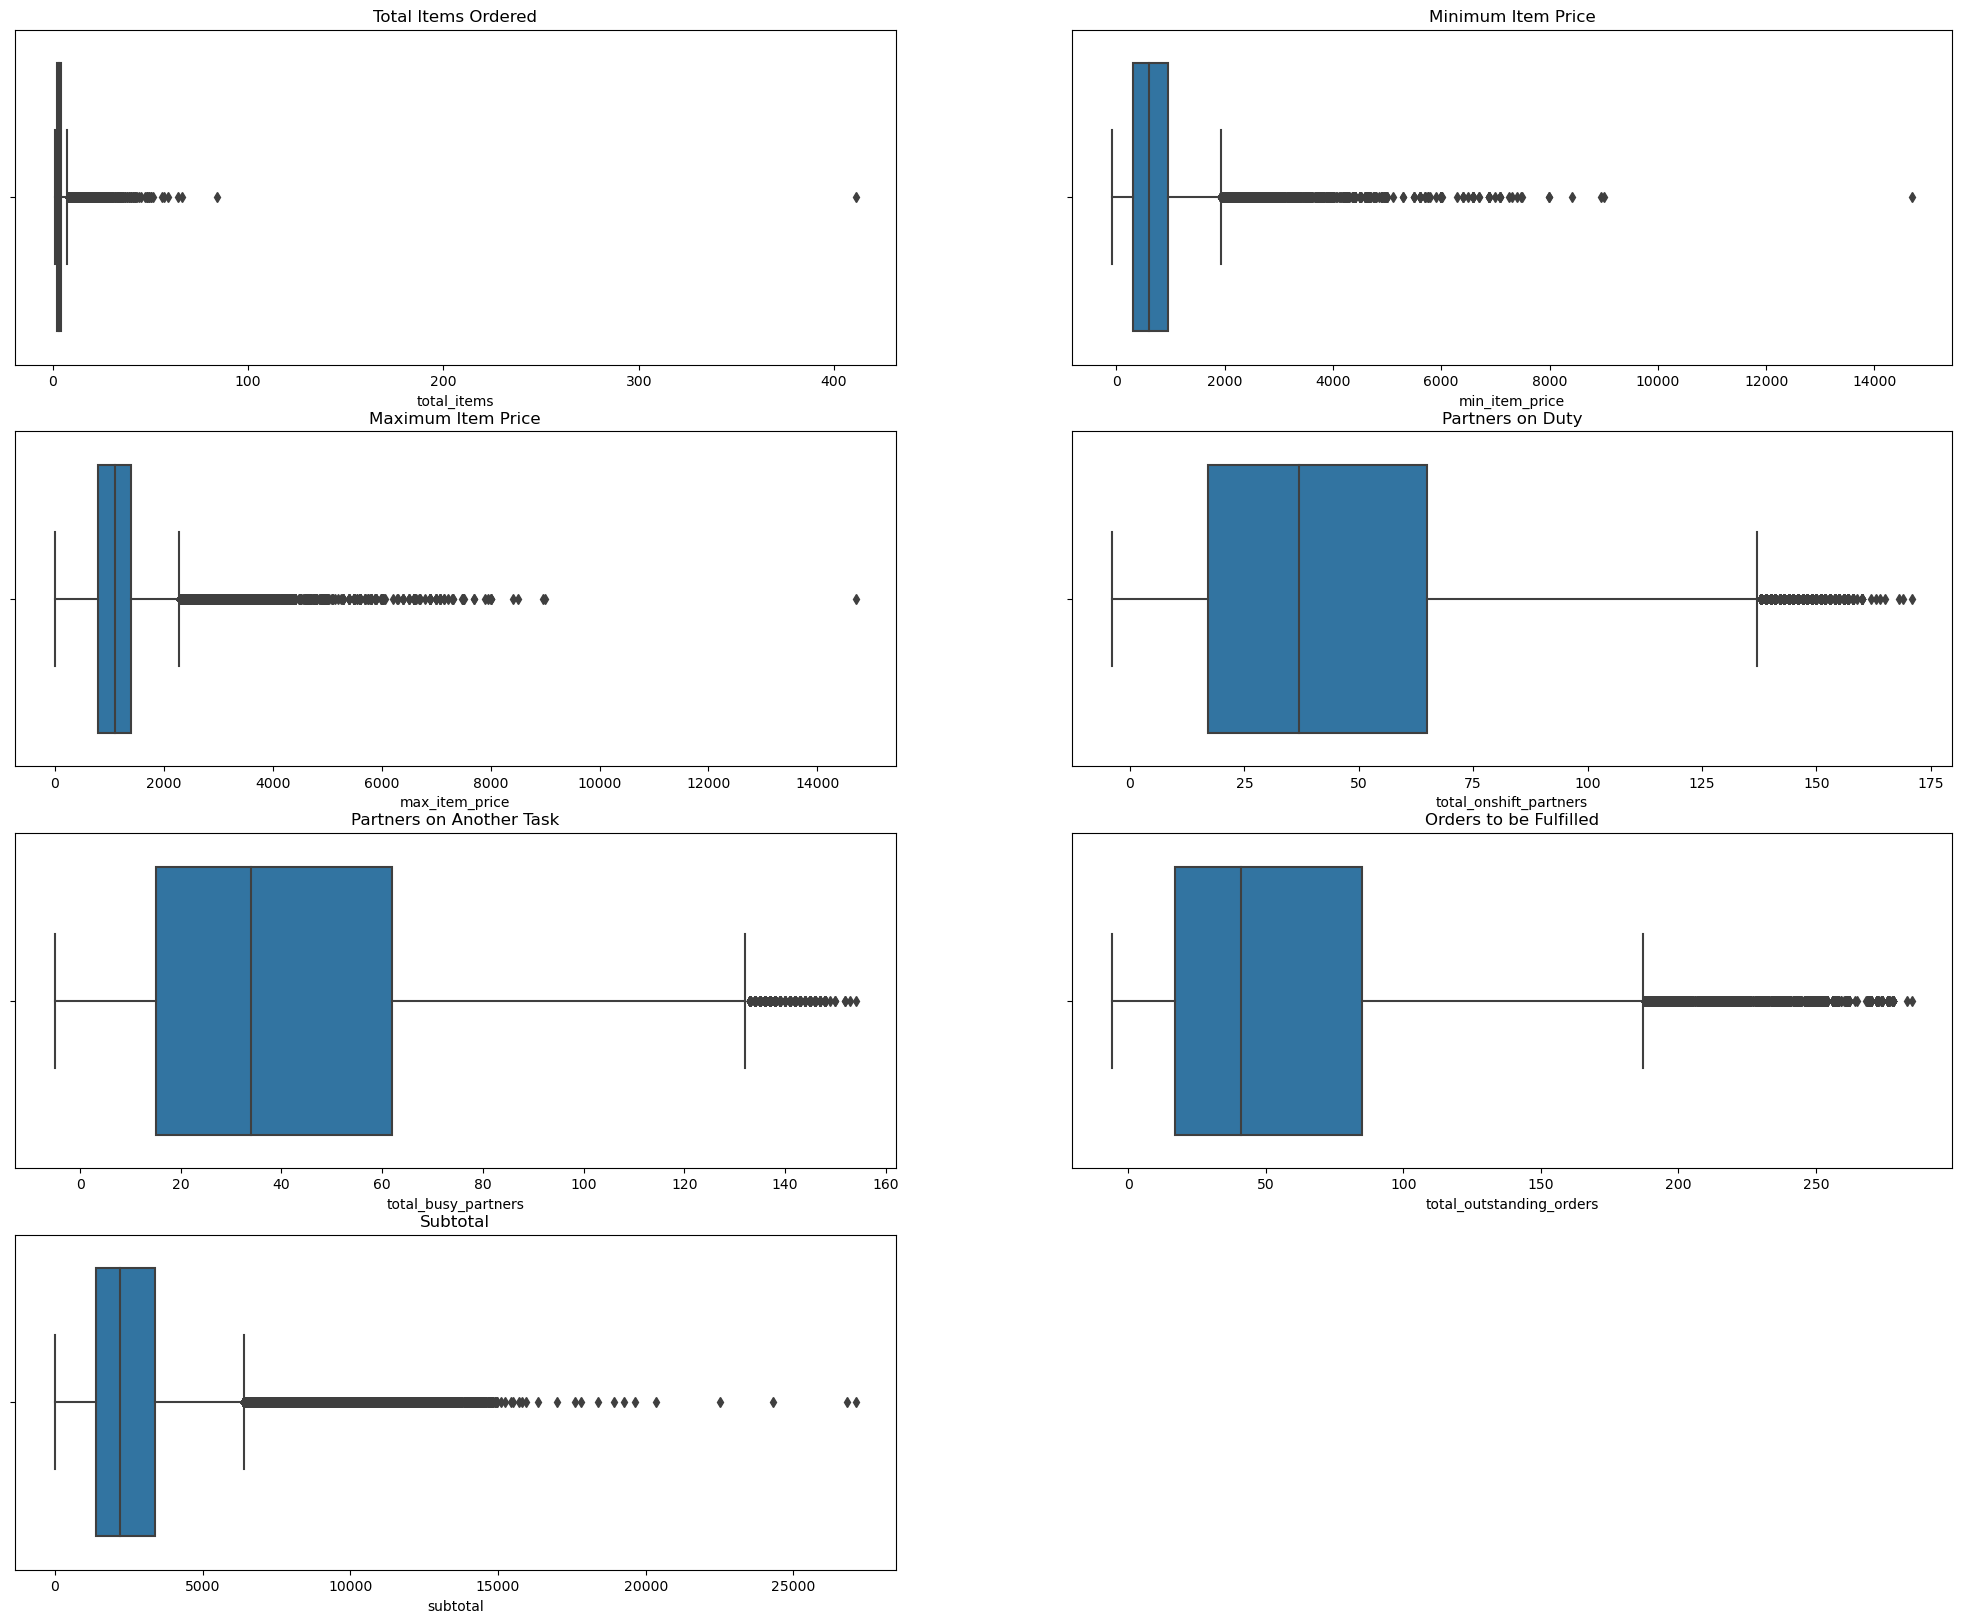

In [10]:
plt.figure(figsize=(25,20))

plt.subplot(421)
sns.boxplot(x = 'total_items',data = df)
plt.title("Total Items Ordered")

plt.subplot(422)
sns.boxplot(x = 'min_item_price',data = df)                         # ploting Box plot to see outliers
plt.title("Minimum Item Price")

plt.subplot(423)
sns.boxplot(x = 'max_item_price',data = df)
plt.title("Maximum Item Price")

plt.subplot(424)
sns.boxplot(x = 'total_onshift_partners',data = df)
plt.title("Partners on Duty")

plt.subplot(425)
sns.boxplot(x = 'total_busy_partners',data = df)
plt.title("Partners on Another Task")

plt.subplot(426)
sns.boxplot(x = 'total_outstanding_orders',data = df)
plt.title("Orders to be Fulfilled")

plt.subplot(427)
sns.boxplot(x = 'subtotal',data = df)
plt.title("Subtotal")




In [11]:
df1 = df.copy()   # Copy the Data to save original dataset

In [12]:
df1[['subtotal',
'total_items','min_item_price', 'max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders'
]] = df[['subtotal','total_items','min_item_price', 'max_item_price','total_onshift_partners','total_busy_partners','total_outstanding_orders'
]].abs()


# Used abs() : For absolute values

In [13]:
df1.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.222339,1159.588630,44.808524,41.740166,58.051433
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.033561,558.411377,34.526225,32.145188,52.660321
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [14]:
def outlier_handle(df1 , feature):                # Creating a function to handle outliers
    percentile75 = df1[feature].quantile(0.75)
    percentile25 = df1[feature].quantile(0.25)              
    
    IQR = percentile75 - percentile25                     # use IQR method
    
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    
    print("Upper_limit",upper_limit)
    print("Lower_limit",lower_limit)
    
    df1[feature] = np.where(df1[feature] > upper_limit , upper_limit,       # to reduce dataloss we will not drop value
                    np.where(df1[feature] < lower_limit , lower_limit,      #  we use np.where() for imputation
                            df1[feature]
                            )
                           )



Implementation of function

Upper_limit 7.0
Lower_limit -1.0


Text(0.5, 1.0, 'Total Items Ordered_updated')

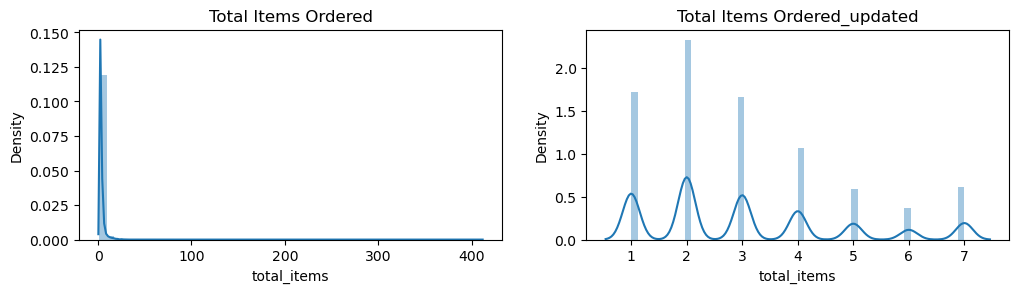

In [15]:
outlier_handle(df1, 'total_items')         

plt.figure(figsize=(12,6))

plt.subplot(221)
sns.distplot(df['total_items'])           # plot with Outliers
plt.title("Total Items Ordered")

plt.subplot(222)
sns.distplot(df1['total_items'])              # plot after removing Outliers
plt.title("Total Items Ordered_updated")

Upper_limit 1924.0
Lower_limit -676.0


Text(0.5, 1.0, 'Minimum Items Price_updated')

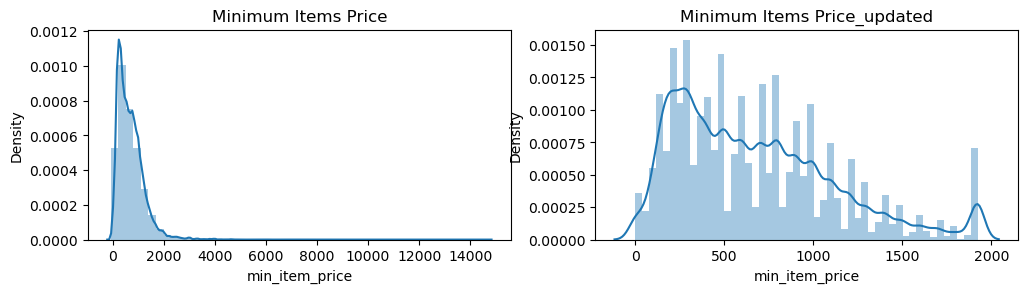

In [16]:
outlier_handle(df1, 'min_item_price')

plt.figure(figsize=(12,6))

plt.subplot(221)
sns.distplot(df['min_item_price'])            # plot with Outliers
plt.title("Minimum Items Price")

plt.subplot(222)
sns.distplot(df1['min_item_price'])                   # plot after removing Outliers
plt.title("Minimum Items Price_updated")

Upper_limit 2287.5
Lower_limit -92.5


Text(0.5, 1.0, 'Maximum Items Price_updated')

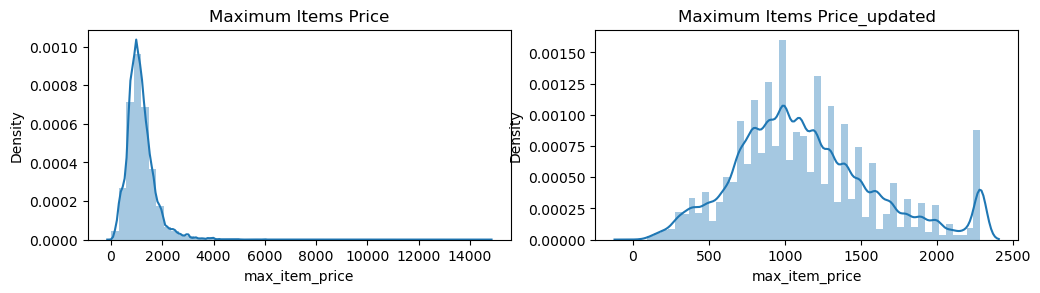

In [17]:
outlier_handle(df1, 'max_item_price')

plt.figure(figsize=(12,6))

plt.subplot(221)
sns.distplot(df['max_item_price'])          # plot with Outliers
plt.title("Maximum Items Price")

plt.subplot(222)
sns.distplot(df1['max_item_price'])           # plot after removing Outliers
plt.title("Maximum Items Price_updated")

Upper_limit 137.0
Lower_limit -55.0


Text(0.5, 1.0, 'Partners on Duty_updated')

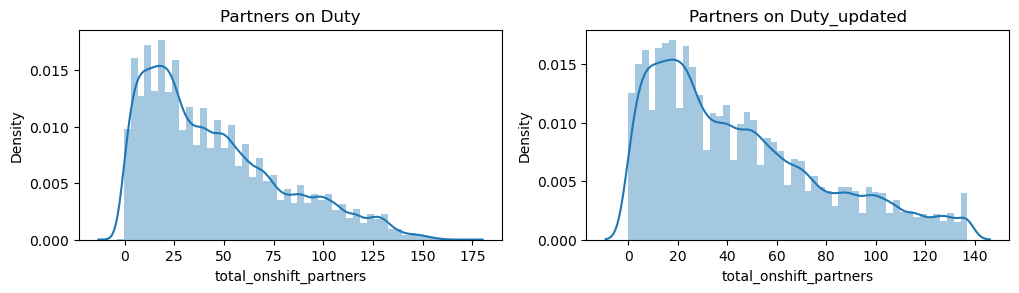

In [18]:
outlier_handle(df1, 'total_onshift_partners')

plt.figure(figsize=(12,6))

plt.subplot(221)
sns.distplot(df['total_onshift_partners'])          # plot with Outliers
plt.title("Partners on Duty")

plt.subplot(222)
sns.distplot(df1['total_onshift_partners'])           # plot after removing Outliers
plt.title("Partners on Duty_updated")

Upper_limit 132.5
Lower_limit -55.5


Text(0.5, 1.0, 'Partners on Another Task_updated ')

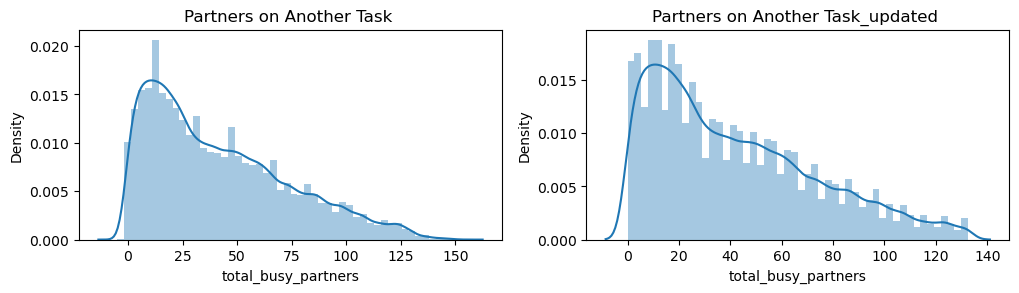

In [19]:
outlier_handle(df1, 'total_busy_partners')

plt.figure(figsize=(12,6))

plt.subplot(221)
sns.distplot(df['total_busy_partners'])                  # plot with Outlier
plt.title("Partners on Another Task ")

plt.subplot(222)
sns.distplot(df1['total_busy_partners'])                   # plot after removing Outliers
plt.title("Partners on Another Task_updated ")

Upper_limit 187.0
Lower_limit -85.0


Text(0.5, 1.0, 'Orders to be fulfilled_updated')

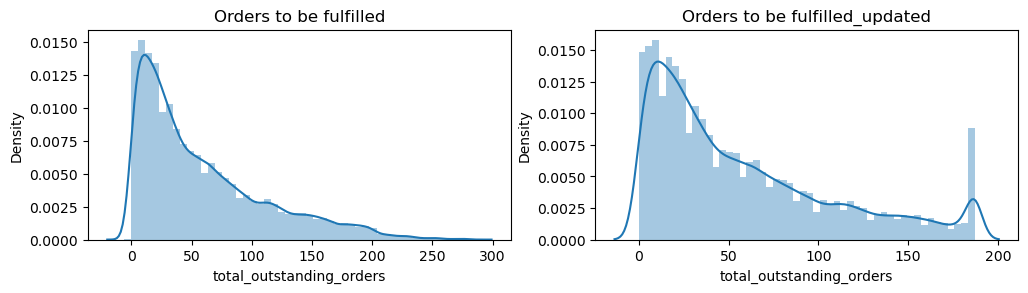

In [20]:
outlier_handle(df1, 'total_outstanding_orders')

plt.figure(figsize=(12,6))
plt.subplot(221)
sns.distplot(df['total_outstanding_orders'])            # plot with Outlier
plt.title("Orders to be fulfilled")

plt.subplot(222)
sns.distplot(df1['total_outstanding_orders'])           # plot after removing Outliers
plt.title("Orders to be fulfilled_updated")

8068.919999999984
649.0


Text(0.5, 1.0, 'subtotal_updated')

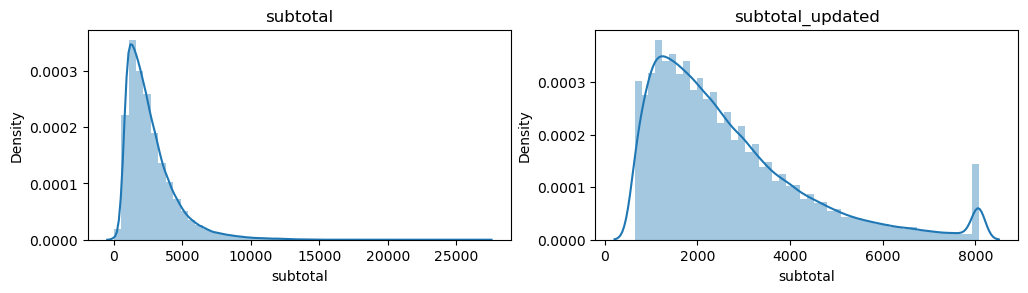

In [21]:
 # In subtotal column we use percentile method to save the important data because IQR method replace most of the data

upper_limit = df1['subtotal'].quantile(0.98)
lower_limit= df1['subtotal'].quantile(0.02)                  # use Percentile Method

print(upper_limit)
print(lower_limit)

df1['subtotal'] = np.where(df1['subtotal'] > upper_limit , upper_limit,           # imputation of data
                    np.where(df1['subtotal'] < lower_limit , lower_limit,
                            df1['subtotal']))

plt.figure(figsize=(12,6))

plt.subplot(221)                                      
sns.distplot(df['subtotal'])                               # plot with Outlier
plt.title('subtotal')

plt.subplot(222)
sns.distplot(df1['subtotal'])
plt.title('subtotal_updated')                                # plot after removing Outliers

Text(0.5, 1.0, 'Subtotal')

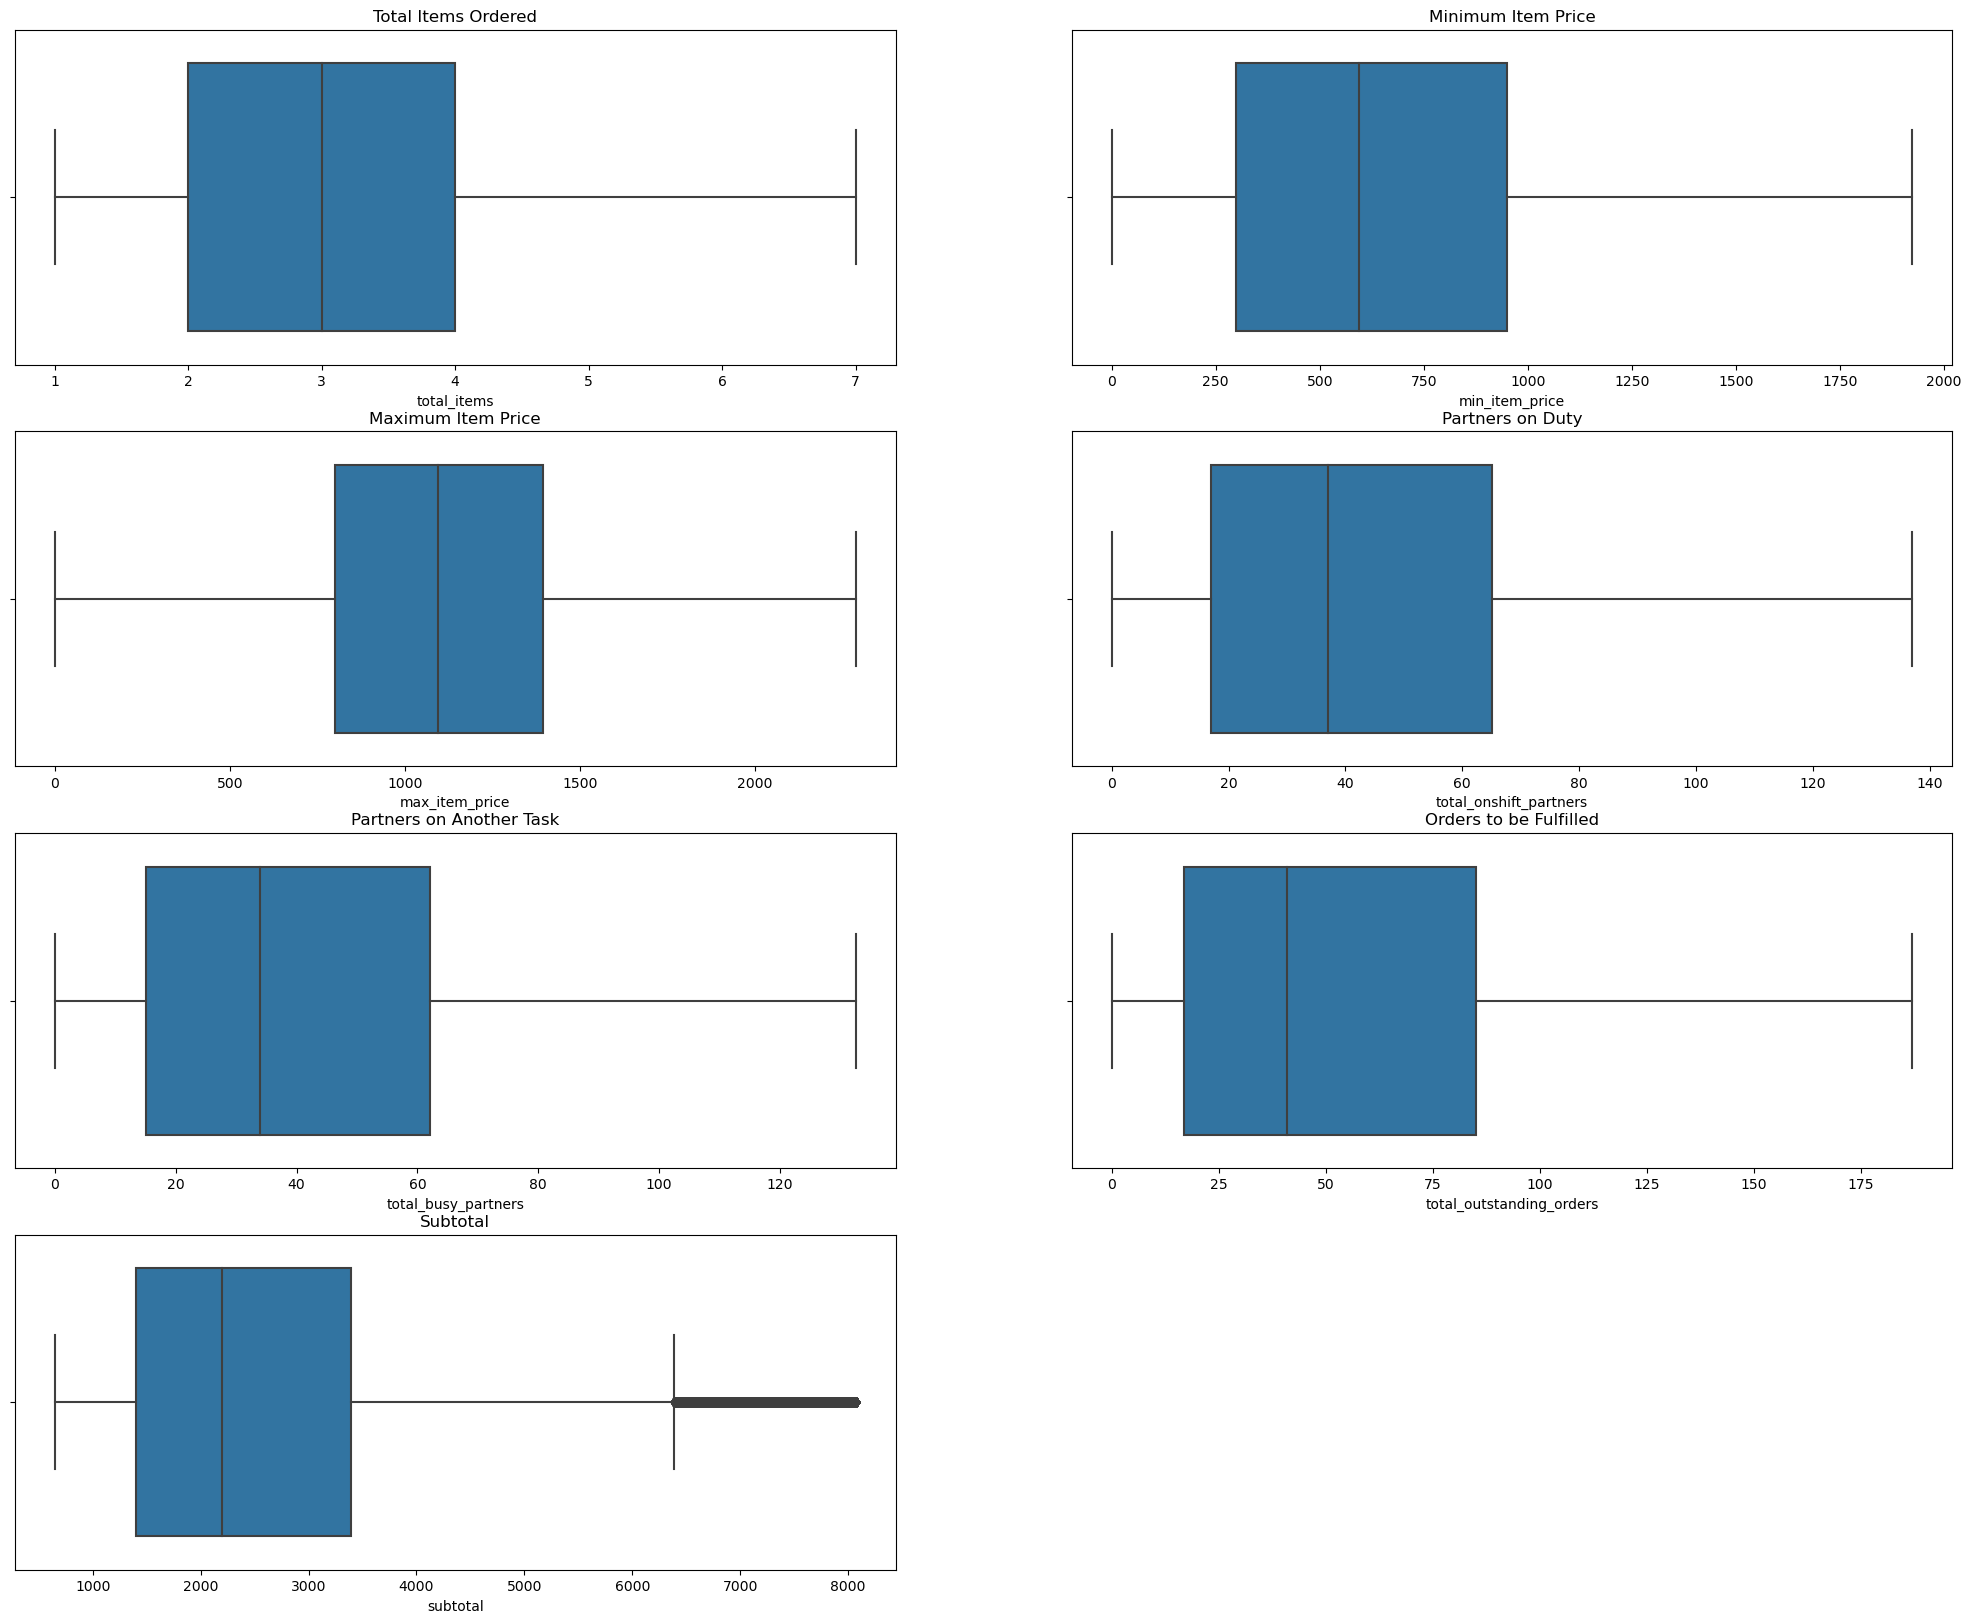

In [22]:
plt.figure(figsize=(25,20))

plt.subplot(421)
sns.boxplot(x = 'total_items',data = df1)
plt.title("Total Items Ordered")

plt.subplot(422)
sns.boxplot(x = 'min_item_price',data = df1)
plt.title("Minimum Item Price")

plt.subplot(423)
sns.boxplot(x = 'max_item_price',data = df1)
plt.title("Maximum Item Price")

plt.subplot(424)
sns.boxplot(x = 'total_onshift_partners',data = df1)
plt.title("Partners on Duty")

plt.subplot(425)
sns.boxplot(x = 'total_busy_partners',data = df1)
plt.title("Partners on Another Task")

plt.subplot(426)
sns.boxplot(x = 'total_outstanding_orders',data = df1)
plt.title("Orders to be Fulfilled")

plt.subplot(427)
sns.boxplot(x = 'subtotal',data = df1)
plt.title("Subtotal")

# Data Preprocessing

Handling Missing Values

In [23]:
df1.isnull().sum()   # function to check and sum missing values

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

<Axes: >

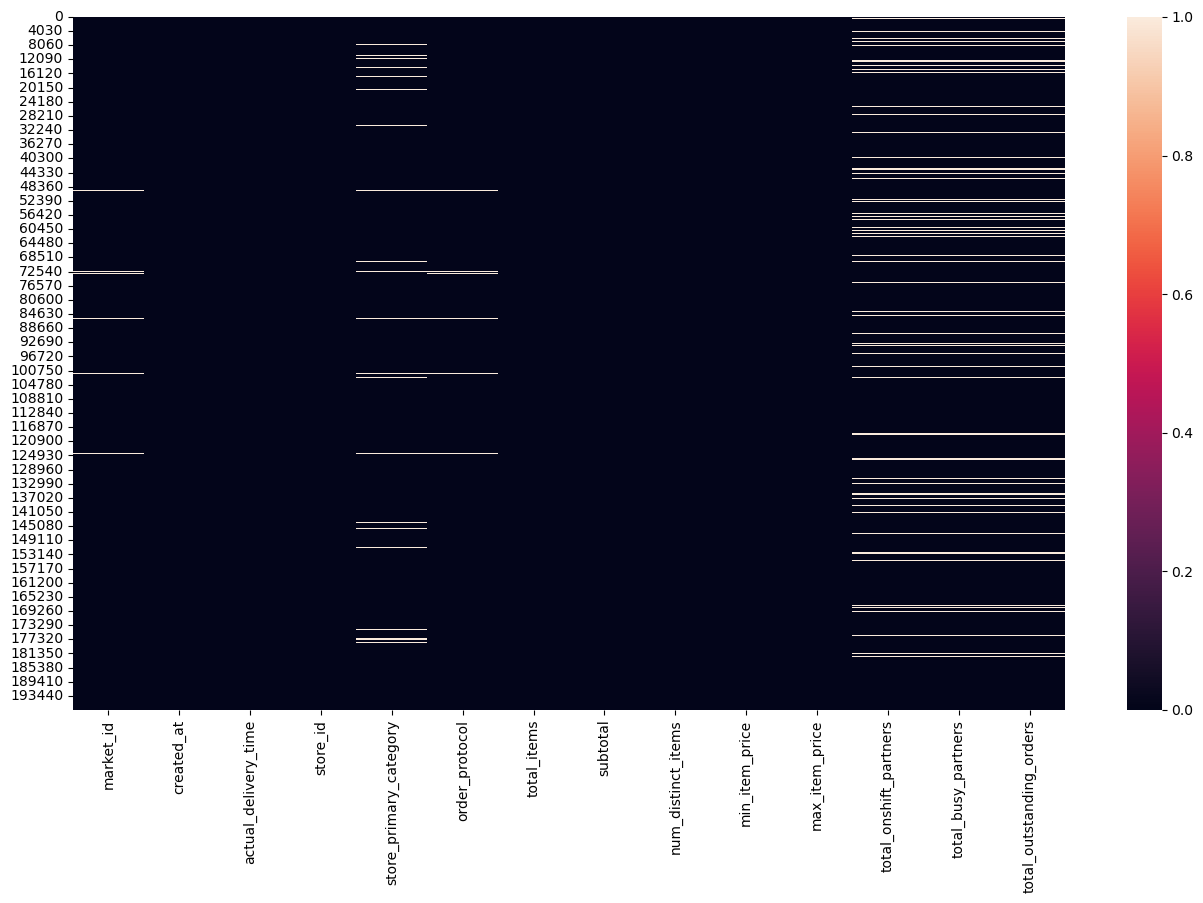

In [24]:
plt.figure(figsize = (16,9))
sns.heatmap(df1.isnull())              # graphical Representation of Null values

In [25]:
null_percent = df1.isnull().sum()/df1.shape[0]*100     # percentage of null values in each columns
null_percent

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
dtype: float64

In [26]:
# Targeted Columns

# market_id                
# actual_delivery_time                      
# store_primary_category      
# order_protocol             
# total_onshift_partners    
# total_busy_partners         
# total_outstanding_orders 

In [27]:
df1['market_id'].value_counts()  

market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64

In [28]:
market_id_mode = df1['market_id'].mode()[0]      # for categorical coulmn we use mode to handle missing values
print('market_id_mode : ', market_id_mode )

df1['market_id'].replace(np.nan,market_id_mode,inplace = True)   # imputation of mode value

print('Null value : ' ,df1['market_id'].isnull().sum())


market_id_mode :  2.0
Null value :  0


In [29]:
df1['order_protocol'].value_counts()

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64

In [30]:
order_protocol_mode = df1['order_protocol'].mode()[0]      # for categorical coulmn we use mode to handle missing values
print('order_protocol_mode : ', order_protocol_mode )

df1['order_protocol'].replace(np.nan,order_protocol_mode,inplace = True)   # imputation of mode value

print('Null value : ' ,df1['order_protocol'].isnull().sum())


order_protocol_mode :  1.0
Null value :  0


In [31]:
df1['store_primary_category'].value_counts()

store_primary_category
american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64

In [32]:
store_primary_category_mode = df1['store_primary_category'].mode()[0]  # for categorical coulmn we use mode to handle missing values
print( "store_primary_category_mode : ",store_primary_category_mode)

df1['store_primary_category'].replace(np.nan,store_primary_category_mode,inplace = True)  # imputation of mode value

print('Null value : ' ,df1['store_primary_category'].isnull().sum())



store_primary_category_mode :  american
Null value :  0


Text(0.5, 1.0, 'Partners on Duty ')

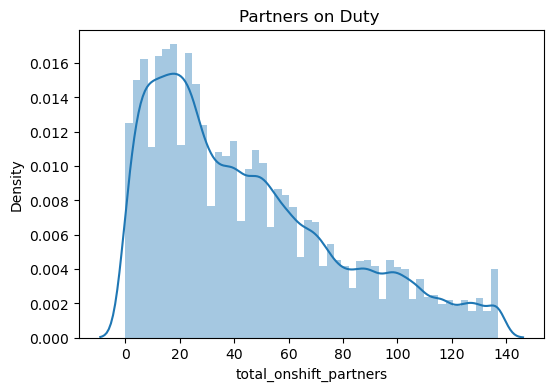

In [33]:
plt.figure(figsize=(6,4))

sns.distplot(df1['total_onshift_partners'])        # use graph to see the measure of central tendency 
plt.title("Partners on Duty ")

In [34]:
# from graph we conclude that line is going towards outliers , so we use median value to handle the mising values

total_onshift_partners_median = round(df1['total_onshift_partners'].median())

print("total_onshift_partners_median : ",total_onshift_partners_median)

df1['total_onshift_partners'].replace(np.nan,total_onshift_partners_median,inplace = True)

print("Null Value" , df1['total_onshift_partners'].isnull().sum())


total_onshift_partners_median :  37
Null Value 0


Text(0.5, 1.0, 'Partners on Another Task ')

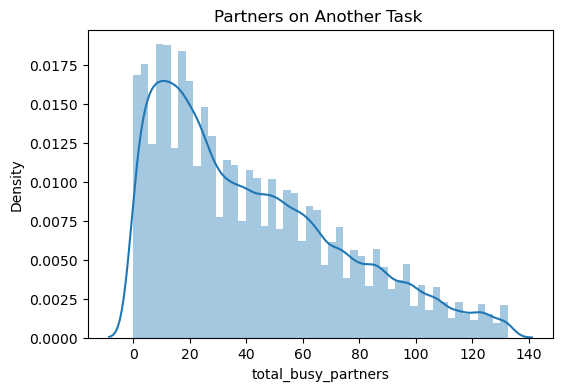

In [35]:
plt.figure(figsize=(6,4))

sns.distplot(df1['total_busy_partners'])          # use graph to see the measure of central tendency 
plt.title("Partners on Another Task ")

In [36]:
# from graph we conclude that line is going towards outliers , so we use median value to handle the mising values

total_busy_partners_median = round(df1['total_busy_partners'].median())
print("total_busy_partners_median : ",total_busy_partners_median)

df1['total_busy_partners'].replace(np.nan,total_busy_partners_median,inplace = True)
print("Null Value" , df1['total_busy_partners'].isnull().sum())



total_busy_partners_median :  34
Null Value 0


In [37]:
type(df1['total_busy_partners'].median())

float

Text(0.5, 1.0, 'Orders to be Fulfilled ')

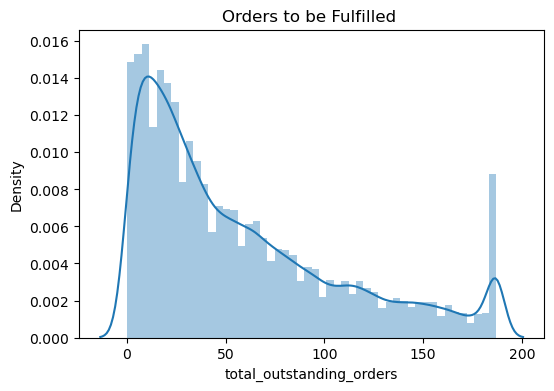

In [38]:
plt.figure(figsize=(6,4))

sns.distplot(df1['total_outstanding_orders'])             # use graph to see the measure of central tendency 
plt.title("Orders to be Fulfilled ")

In [39]:
# from graph we conclude that line is going towards outliers , so we use median value to handle the mising values


total_outstanding_orders_median = round(df1['total_outstanding_orders'].median())
print("total_outstanding_orders_median : ",total_outstanding_orders_median)

df1['total_outstanding_orders'].replace(np.nan,total_outstanding_orders_median,inplace = True)
print("Null Value" , df1['total_outstanding_orders'].isnull().sum())



total_outstanding_orders_median :  41
Null Value 0


In [40]:
# Handling the Last column


df1 = df1.dropna(subset = ['actual_delivery_time'])

print("Null Value" , df1['actual_delivery_time'].isnull().sum())


Null Value 0


Improvements after removing Null Values

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


<Axes: >

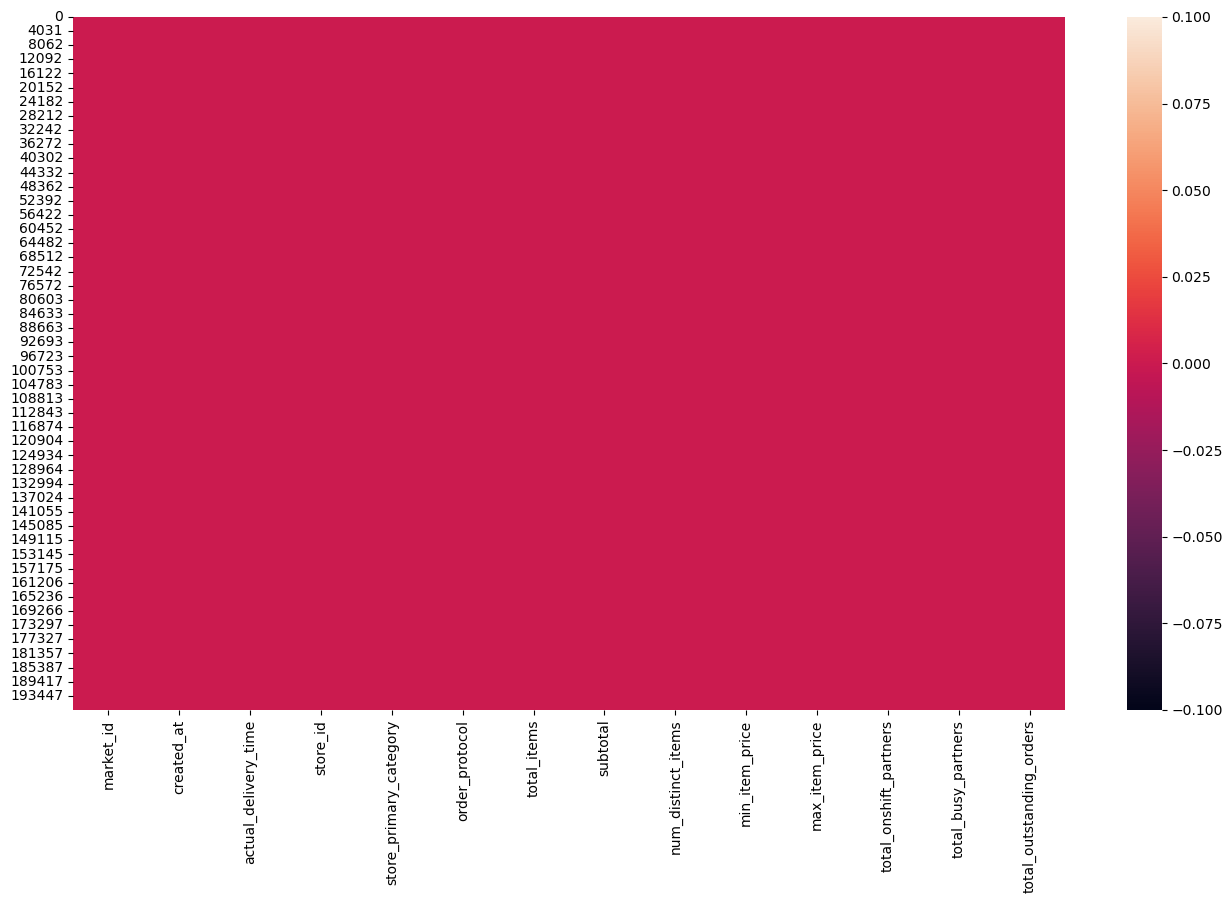

In [41]:
print(df1.isnull().sum())
plt.figure(figsize = (16,9))
sns.heatmap(df1.isnull())



# Feature Engineering

Changing Datatypes of Required Columns

In [42]:
# int_type_conversion

In [43]:
int_type = ["market_id" ,"total_items",                                          
            "total_onshift_partners","total_busy_partners","total_outstanding_orders"]  

In [44]:
for feat in int_type:                                    # use for loop to change to int type
    df1[feat] = df1[feat].astype(int)

In [45]:
# object type conversion

In [46]:

df1['order_protocol'] = df1['order_protocol'].astype('object')     # object type conversion


In [47]:
# date_time_type conversion

In [48]:
df1['created_at'] = pd.to_datetime(df1['created_at'], format='%m/%d/%Y %H:%M')
df1['actual_delivery_time'] = pd.to_datetime(df1['actual_delivery_time'], format='%m/%d/%Y %H:%M')



In [49]:
# After Conversion

In [50]:
df1.dtypes

market_id                            int32
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                            object
store_primary_category              object
order_protocol                      object
total_items                          int32
subtotal                           float64
num_distinct_items                   int64
min_item_price                     float64
max_item_price                     float64
total_onshift_partners               int32
total_busy_partners                  int32
total_outstanding_orders             int32
dtype: object

Extarction of Columns

In [51]:
df1['order_year'] = df1['created_at'].dt.year    # Extract year from datatime column

df1['order_month_name'] = df1['created_at'].dt.month_name()    # Extract name of the month from datatime column

df1['order_month'] = df1['created_at'].dt.month            # Extrac tmonth from datatime column

df1['week_of_month'] = df1['created_at'].dt.day.apply(lambda x : (x -1)//7 + 1)      # Extract week from datatime column

df1['order_day'] = df1['created_at'].dt.day     # Extract day from datatime column

df1['order_day_name'] = df1['created_at'].dt.day_name()      # Extract name of the day from datatime column

df1['order_time(hr)'] = df1['created_at'].dt.hour      # Extract hour from datatime column

df1['time_difference'] = df1['actual_delivery_time'] - df1['created_at']       # Extract time difference from datatime column

df1['delivery_time'] = df1['time_difference'].dt.components['days'] * 24 * 60 + df1['time_difference'].dt.components['hours']*60 + df1['time_difference'].dt.components['minutes']        # Extract minutes from time difference columdf1['time_difference'].dt.components['minutes']

In [52]:
df1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_year,order_month_name,order_month,week_of_month,order_day,order_day_name,order_time(hr),time_difference,delivery_time
0,1,2015-02-06 22:24:00,2015-02-06 23:27:00,df263d996281d984952c07998dc54358,american,1.0,4,3441.0,4,557.0,1239.0,33,14,21,2015,February,2,1,6,Friday,22,0 days 01:03:00,63
1,2,2015-02-10 21:49:00,2015-02-10 22:56:00,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900.0,1,1400.0,1400.0,1,2,2,2015,February,2,2,10,Tuesday,21,0 days 01:07:00,67
2,3,2015-01-22 20:39:00,2015-01-22 21:09:00,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900.0,1,1900.0,1900.0,1,0,0,2015,January,1,4,22,Thursday,20,0 days 00:30:00,30
3,3,2015-02-03 21:21:00,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900.0,5,600.0,1800.0,1,1,2,2015,February,2,1,3,Tuesday,21,0 days 00:52:00,52
4,3,2015-02-15 02:40:00,2015-02-15 03:20:00,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900.0,3,1100.0,1600.0,6,6,9,2015,February,2,3,15,Sunday,2,0 days 00:40:00,40


feature based on the availability of delivery partners, such as a ratio of total_busy_partners to total_onshift_partners ?

In [53]:
def avl_del(col1,col2):                
    if col2 != 0:             
        return(col1/col2)
    else:
        return(0)


In [54]:
df1['avl_ratio'] = df1[['total_busy_partners','total_onshift_partners']].apply(lambda x:avl_del(x['total_busy_partners'],x['total_onshift_partners']),axis = 1)

In [55]:
df1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_year,order_month_name,order_month,week_of_month,order_day,order_day_name,order_time(hr),time_difference,delivery_time,avl_ratio
0,1,2015-02-06 22:24:00,2015-02-06 23:27:00,df263d996281d984952c07998dc54358,american,1.0,4,3441.0,4,557.0,1239.0,33,14,21,2015,February,2,1,6,Friday,22,0 days 01:03:00,63,0.424242
1,2,2015-02-10 21:49:00,2015-02-10 22:56:00,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900.0,1,1400.0,1400.0,1,2,2,2015,February,2,2,10,Tuesday,21,0 days 01:07:00,67,2.000000
2,3,2015-01-22 20:39:00,2015-01-22 21:09:00,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900.0,1,1900.0,1900.0,1,0,0,2015,January,1,4,22,Thursday,20,0 days 00:30:00,30,0.000000
3,3,2015-02-03 21:21:00,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900.0,5,600.0,1800.0,1,1,2,2015,February,2,1,3,Tuesday,21,0 days 00:52:00,52,1.000000
4,3,2015-02-15 02:40:00,2015-02-15 03:20:00,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900.0,3,1100.0,1600.0,6,6,9,2015,February,2,3,15,Sunday,2,0 days 00:40:00,40,1.000000


In [56]:
# handling outlier of new column('delivery_time(in min)')

<Axes: xlabel='delivery_time'>

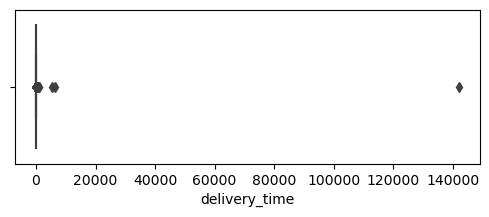

In [57]:
plt.figure(figsize = (6,2))
sns.boxplot(x = 'delivery_time',data = df1)

In [58]:
df1 = df1[df1['delivery_time']<=1000]

In [59]:
# we will filter the categorical column of higher weightage in dataset for better visualization

In [60]:
df1['order_protocol'].value_counts(normalize = True)*100

order_protocol
1.0    28.222857
3.0    26.945871
5.0    22.433618
2.0    12.182780
4.0     9.803057
6.0     0.402192
7.0     0.009624
Name: proportion, dtype: float64

In [61]:
df1 = df1[df1['order_protocol'] <=5]

# Encoding the Categorical Column

In [62]:
df2 = df1.copy()    

In [63]:
# 'store_primary_category_encoded'

In [67]:
# use OrdinalEncoding method for encoding beacuse of multiple number of categories in the column

from sklearn.preprocessing import OrdinalEncoder       

encoder = OrdinalEncoder(categories=[['american', 'pizza', 'mexican', 'burger', 'sandwich', 'chinese',
       'japanese', 'dessert', 'fast', 'indian', 'thai', 'italian',
       'vietnamese', 'mediterranean', 'breakfast', 'other', 'salad', 'greek',               # categories are sorted in descending order
       'seafood', 'barbecue', 'asian', 'cafe', 'sushi', 'alcohol', 'korean',
       'smoothie', 'catering', 'middle-eastern', 'hawaiian', 'dim-sum','steak','vegetarian',  
       'burmese','pasta','persian','french','latin-american','bubble-tea','convenience-store',                             
       'cajun','brazilian','nepalese','vegan','filipino','peruvian', 'caribbean','turkish',
       'gastropub', 'southern', 'tapas', 'pakistani', 'ethiopian',
       'british', 'afghan', 'malaysian', 'soup', 'argentine', 'german',
       'gluten-free', 'irish', 'kosher', 'spanish', 'singaporean',
       'comfort-food', 'moroccan', 'cheese', 'european', 'russian', 'african',
       'lebanese', 'belgian', 'indonesian', 'chocolate', 'alcohol-plus-food']])

df2['store_primary_category_encoded'] = encoder.fit_transform(df1[['store_primary_category']])   # encoding


In [68]:
df2 = df2[df2['store_primary_category_encoded'] <=30] # for better visualization of data we extarct top 30 categories

In [69]:
# 'order_protocol_encoded'

In [70]:
# use OneHotEncoding method 

from sklearn.preprocessing import OneHotEncoder   

encoder = OneHotEncoder(sparse_output=False,dtype=int)   

enc_ohe = encoder.fit_transform(df2[['order_protocol']])

encoded_df = pd.DataFrame(enc_ohe , columns = encoder.get_feature_names_out(['order_protocol']),index = df2.index)




In [71]:
df2 = pd.concat([df2, encoded_df], axis=1)   # concatinating the encoder with the dataframe

In [72]:
# Count plots for categorical variables like store_primary_category and order_protocol

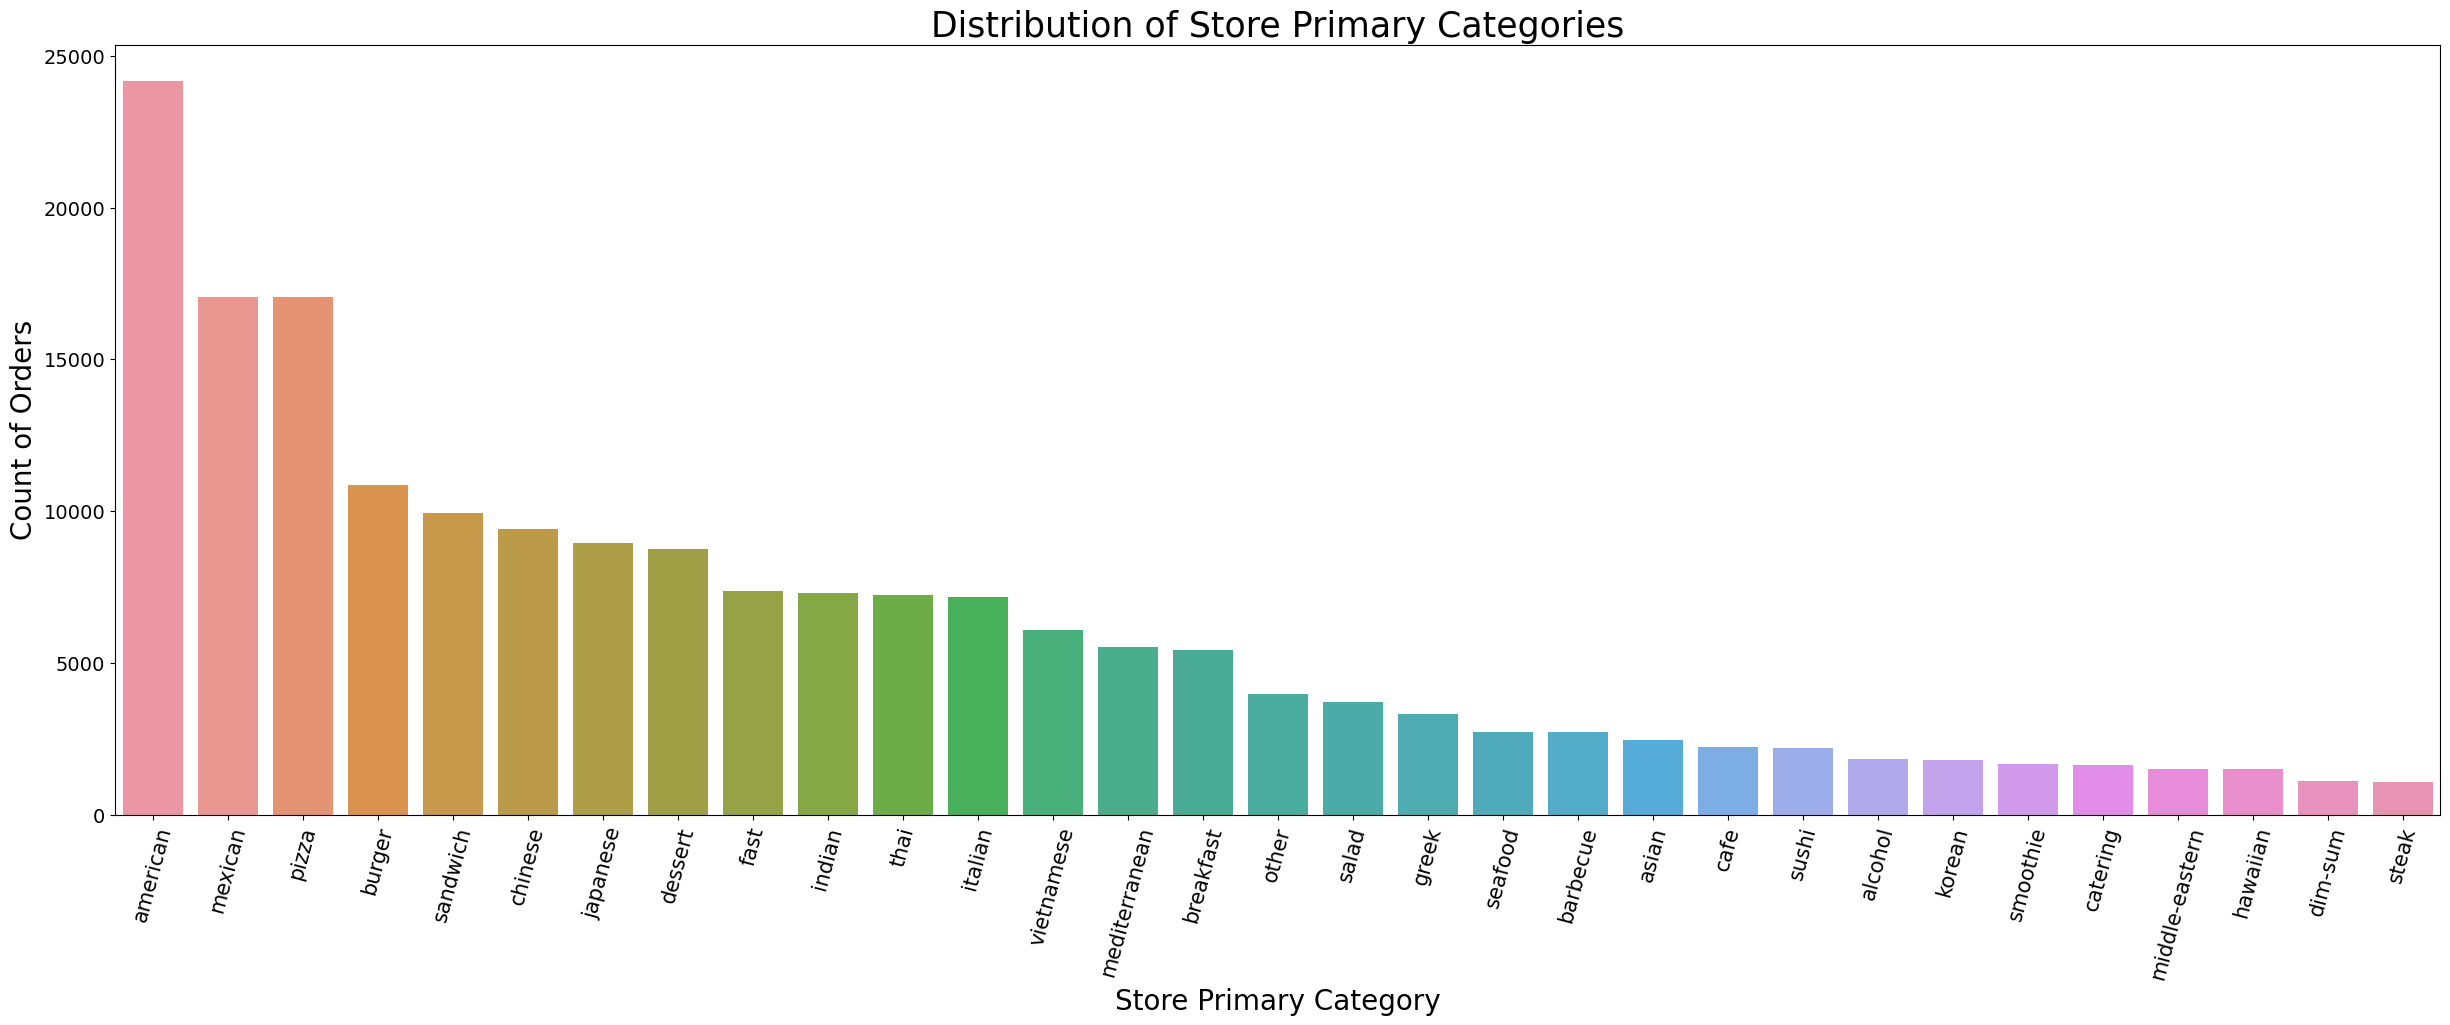

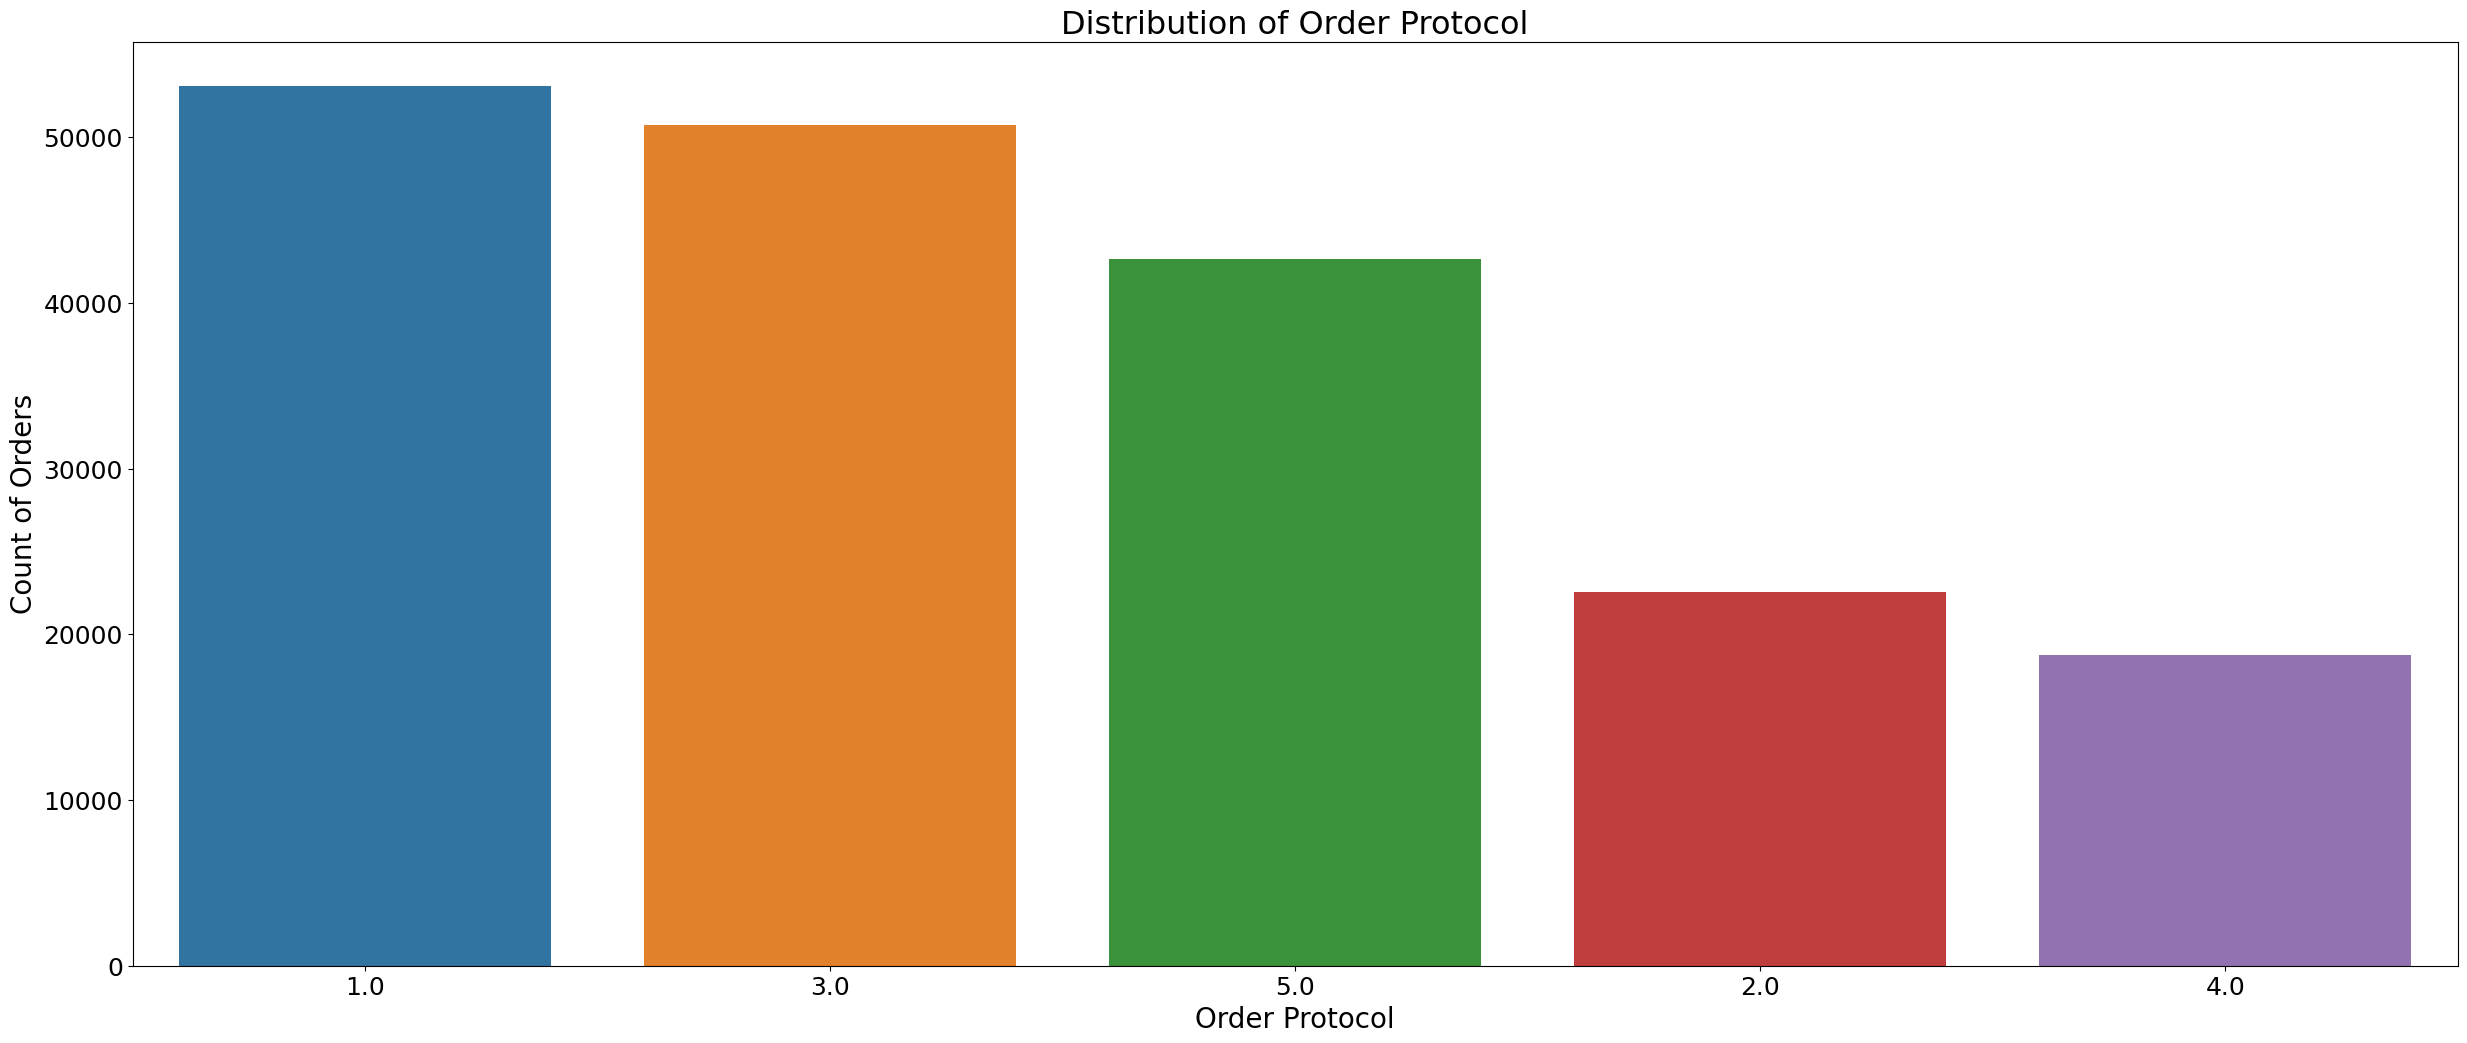

In [73]:

plt.figure(figsize=(30,10))
sns.countplot(data=df2, x='store_primary_category', order=df2['store_primary_category'].value_counts().index)
plt.title('Distribution of Store Primary Categories',size = 25)
plt.xlabel('Store Primary Category' ,size=20)                     
plt.ylabel('Count of Orders' ,size = 20)
plt.xticks(rotation=75 ,size=15)
plt.yticks(size=14)                                  
                                                
plt.figure(figsize=(30,12))
sns.countplot(data=df2, x='order_protocol', order=df2['order_protocol'].value_counts().index )
plt.title('Distribution of Order Protocol',size = 23)
plt.xlabel('Order Protocol', size = 20)
plt.ylabel('Count of Orders', size = 20)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()



In [74]:
df2.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_year,order_month_name,order_month,week_of_month,order_day,order_day_name,order_time(hr),time_difference,delivery_time,avl_ratio,store_primary_category_encoded,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0
0,1,2015-02-06 22:24:00,2015-02-06 23:27:00,df263d996281d984952c07998dc54358,american,1.0,4,3441.0,4,557.0,1239.0,33,14,21,2015,February,2,1,6,Friday,22,0 days 01:03:00,63,0.424242,0.0,1,0,0,0,0
1,2,2015-02-10 21:49:00,2015-02-10 22:56:00,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900.0,1,1400.0,1400.0,1,2,2,2015,February,2,2,10,Tuesday,21,0 days 01:07:00,67,2.000000,2.0,0,1,0,0,0
2,3,2015-01-22 20:39:00,2015-01-22 21:09:00,f0ade77b43923b38237db569b016ba25,american,1.0,1,1900.0,1,1900.0,1900.0,1,0,0,2015,January,1,4,22,Thursday,20,0 days 00:30:00,30,0.000000,0.0,1,0,0,0,0
3,3,2015-02-03 21:21:00,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,american,1.0,6,6900.0,5,600.0,1800.0,1,1,2,2015,February,2,1,3,Tuesday,21,0 days 00:52:00,52,1.000000,0.0,1,0,0,0,0
4,3,2015-02-15 02:40:00,2015-02-15 03:20:00,f0ade77b43923b38237db569b016ba25,american,1.0,3,3900.0,3,1100.0,1600.0,6,6,9,2015,February,2,3,15,Sunday,2,0 days 00:40:00,40,1.000000,0.0,1,0,0,0,0


In [ ]:
# Average orders placed each day||week||month

Average Monthly Orders : 93912
Average weekly Orders : 37565
Average daily Orders : 6477


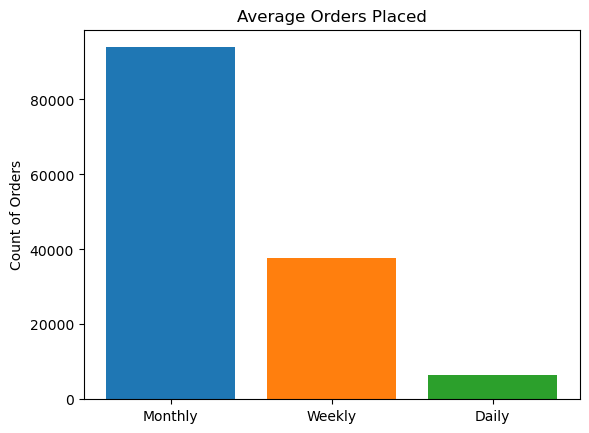

In [75]:
monthly = round(df2.groupby('order_month')['order_month'].value_counts().mean())
weekly = round(df2.groupby('week_of_month')['week_of_month'].value_counts().mean())
daily = round(df2.groupby('order_day')['order_day'].value_counts().mean())
print ('Average Monthly Orders :',monthly)
print ('Average weekly Orders :',weekly)
print ('Average daily Orders :',daily)

plt.bar('Monthly' , monthly )
plt.bar('Weekly' , weekly )
plt.bar('Daily' , daily )
plt.title('Average Orders Placed')
plt.ylabel('Count of Orders')
plt.show()

In [76]:
type(df2.groupby('order_month')['order_month'].value_counts().mean())

numpy.float64

In [77]:
monthly

93912

In [78]:
# Distribution of order times throughout the day

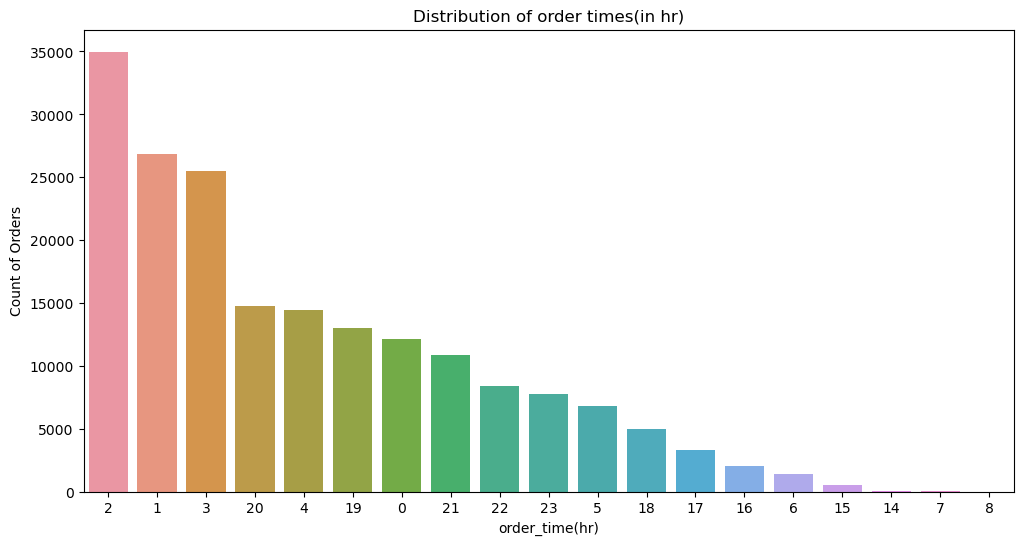

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(data = df2, x = 'order_time(hr)', order =df2['order_time(hr)'].value_counts().index )
plt.title('Distribution of order times(in hr)')
plt.xlabel('order_time(hr)')
plt.ylabel('Count of Orders')
plt.show()


# we observe that from 12:00 a.m to 5:00 a.m ,higher number of order were placed




In [80]:
# Distribution plots for continuous variables like total_items, subtotal, min_item_price, and max_item_price

Text(0, 0.5, 'Frequency')

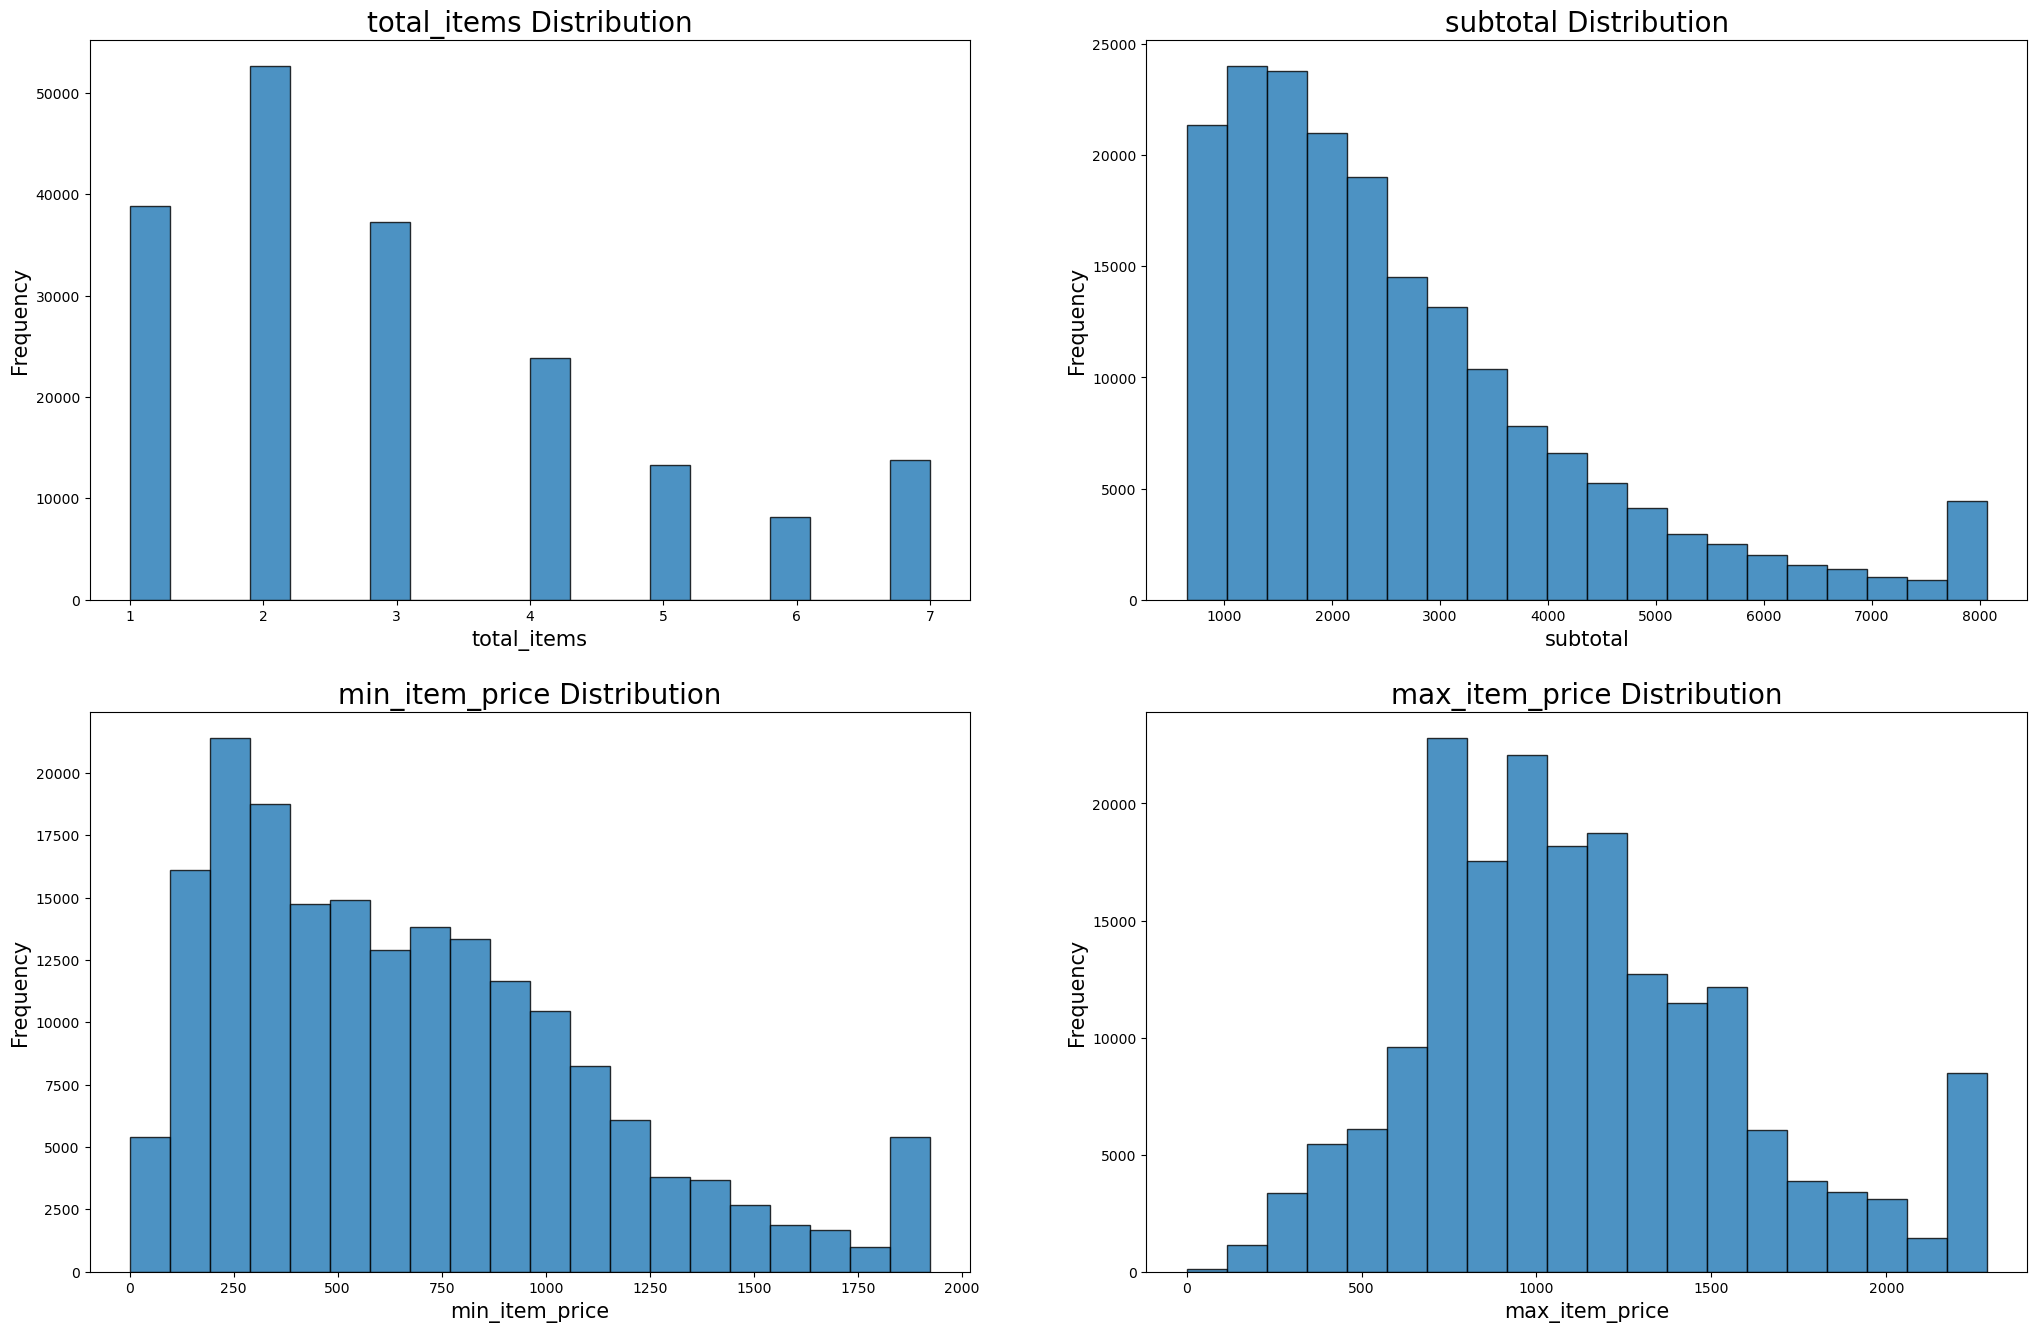

In [81]:
plt.figure(figsize=(25,16))

plt.subplot(221)
plt.hist(df2['total_items'], bins=20, edgecolor='black', alpha=0.8)
plt.title('total_items Distribution',size = 20)
plt.xlabel('total_items',size = 15)
plt.ylabel('Frequency',size = 15)  

plt.subplot(222)
plt.hist(df2['subtotal'], bins=20, edgecolor='black', alpha=0.8)
plt.title('subtotal Distribution',size = 20)
plt.xlabel('subtotal',size = 15)
plt.ylabel('Frequency',size = 15)

plt.subplot(223)
plt.hist(df2['min_item_price'], bins=20, edgecolor='black', alpha=0.8)
plt.title('min_item_price Distribution',size = 20)
plt.xlabel('min_item_price',size = 15)
plt.ylabel('Frequency',size = 15) 

plt.subplot(224)
plt.hist(df2['max_item_price'], bins=20, edgecolor='black', alpha=0.8)
plt.title('max_item_price Distribution',size = 20)
plt.xlabel('max_item_price',size = 15)
plt.ylabel('Frequency',size = 15)    


    

In [82]:
# order time of day and week 

Text(0, 0.5, 'Count of Orders')

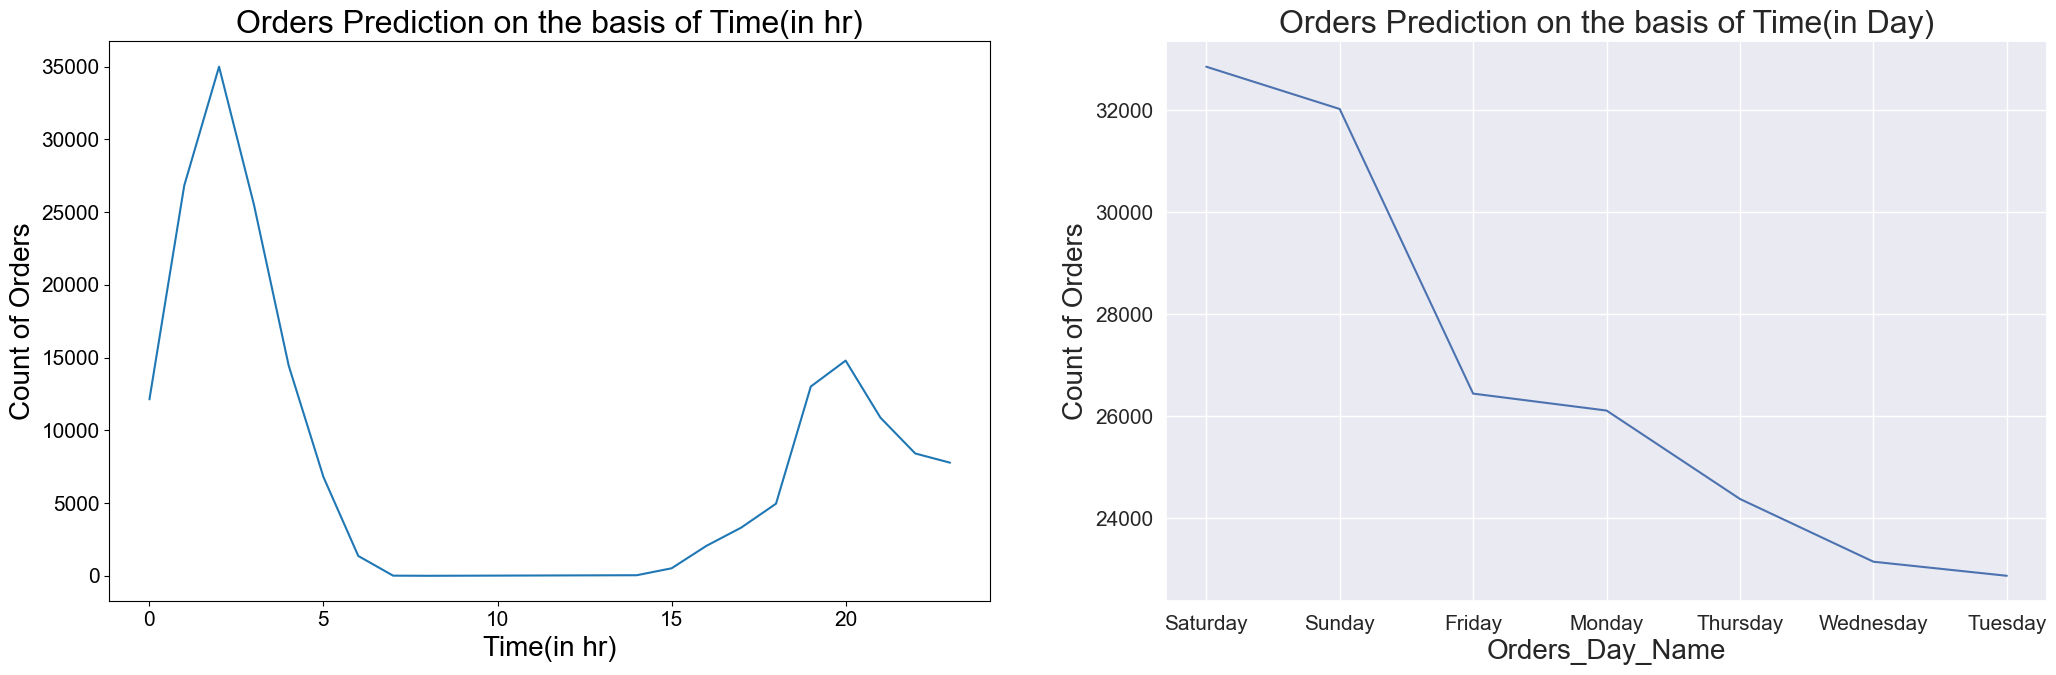

In [83]:
plt.figure(figsize=(25,16))

plt.subplot(221)
sns.set(style = 'darkgrid')
sns.lineplot( x = df2['order_time(hr)'].value_counts().index , y = df2['order_time(hr)'].value_counts().values)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Orders Prediction on the basis of Time(in hr)',size = 23)
plt.xlabel('Time(in hr)', size = 20)
plt.ylabel('Count of Orders', size = 20)

plt.subplot(222)
sns.set(style = 'darkgrid')
sns.lineplot( x = df2['order_day_name'].value_counts().index , y = df2['order_day_name'].value_counts().values)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Orders Prediction on the basis of Time(in Day)',size = 23)
plt.xlabel('Orders_Day_Name', size = 20)
plt.ylabel('Count of Orders', size = 20)



# from graph we say that :
# -- Most of the orders place between 12:00 a.m to 5:00 a.m
# -- Least orders placed between 6:00 a.m to 15:00 p.m
# -- Most orders placed in between Saturday and Sunday
# -- Least orders placed between Tuesday and Wednesday



In [84]:
# For further Analysis we extract numeric columns to perform advanced Visualization

In [85]:
numeric_df = df2.select_dtypes(include='number')

numeric_df.head()


,market_id,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_year,order_month,week_of_month,order_day,order_time(hr),time_difference,delivery_time,avl_ratio,store_primary_category_encoded,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0
0,1,4,3441.0,4,557.0,1239.0,33,14,21,2015,2,1,6,22,0 days 01:03:00,63,0.424242,0.0,1,0,0,0,0
1,2,1,1900.0,1,1400.0,1400.0,1,2,2,2015,2,2,10,21,0 days 01:07:00,67,2.000000,2.0,0,1,0,0,0
2,3,1,1900.0,1,1900.0,1900.0,1,0,0,2015,1,4,22,20,0 days 00:30:00,30,0.000000,0.0,1,0,0,0,0
3,3,6,6900.0,5,600.0,1800.0,1,1,2,2015,2,1,3,21,0 days 00:52:00,52,1.000000,0.0,1,0,0,0,0
4,3,3,3900.0,3,1100.0,1600.0,6,6,9,2015,2,3,15,2,0 days 00:40:00,40,1.000000,0.0,1,0,0,0,0


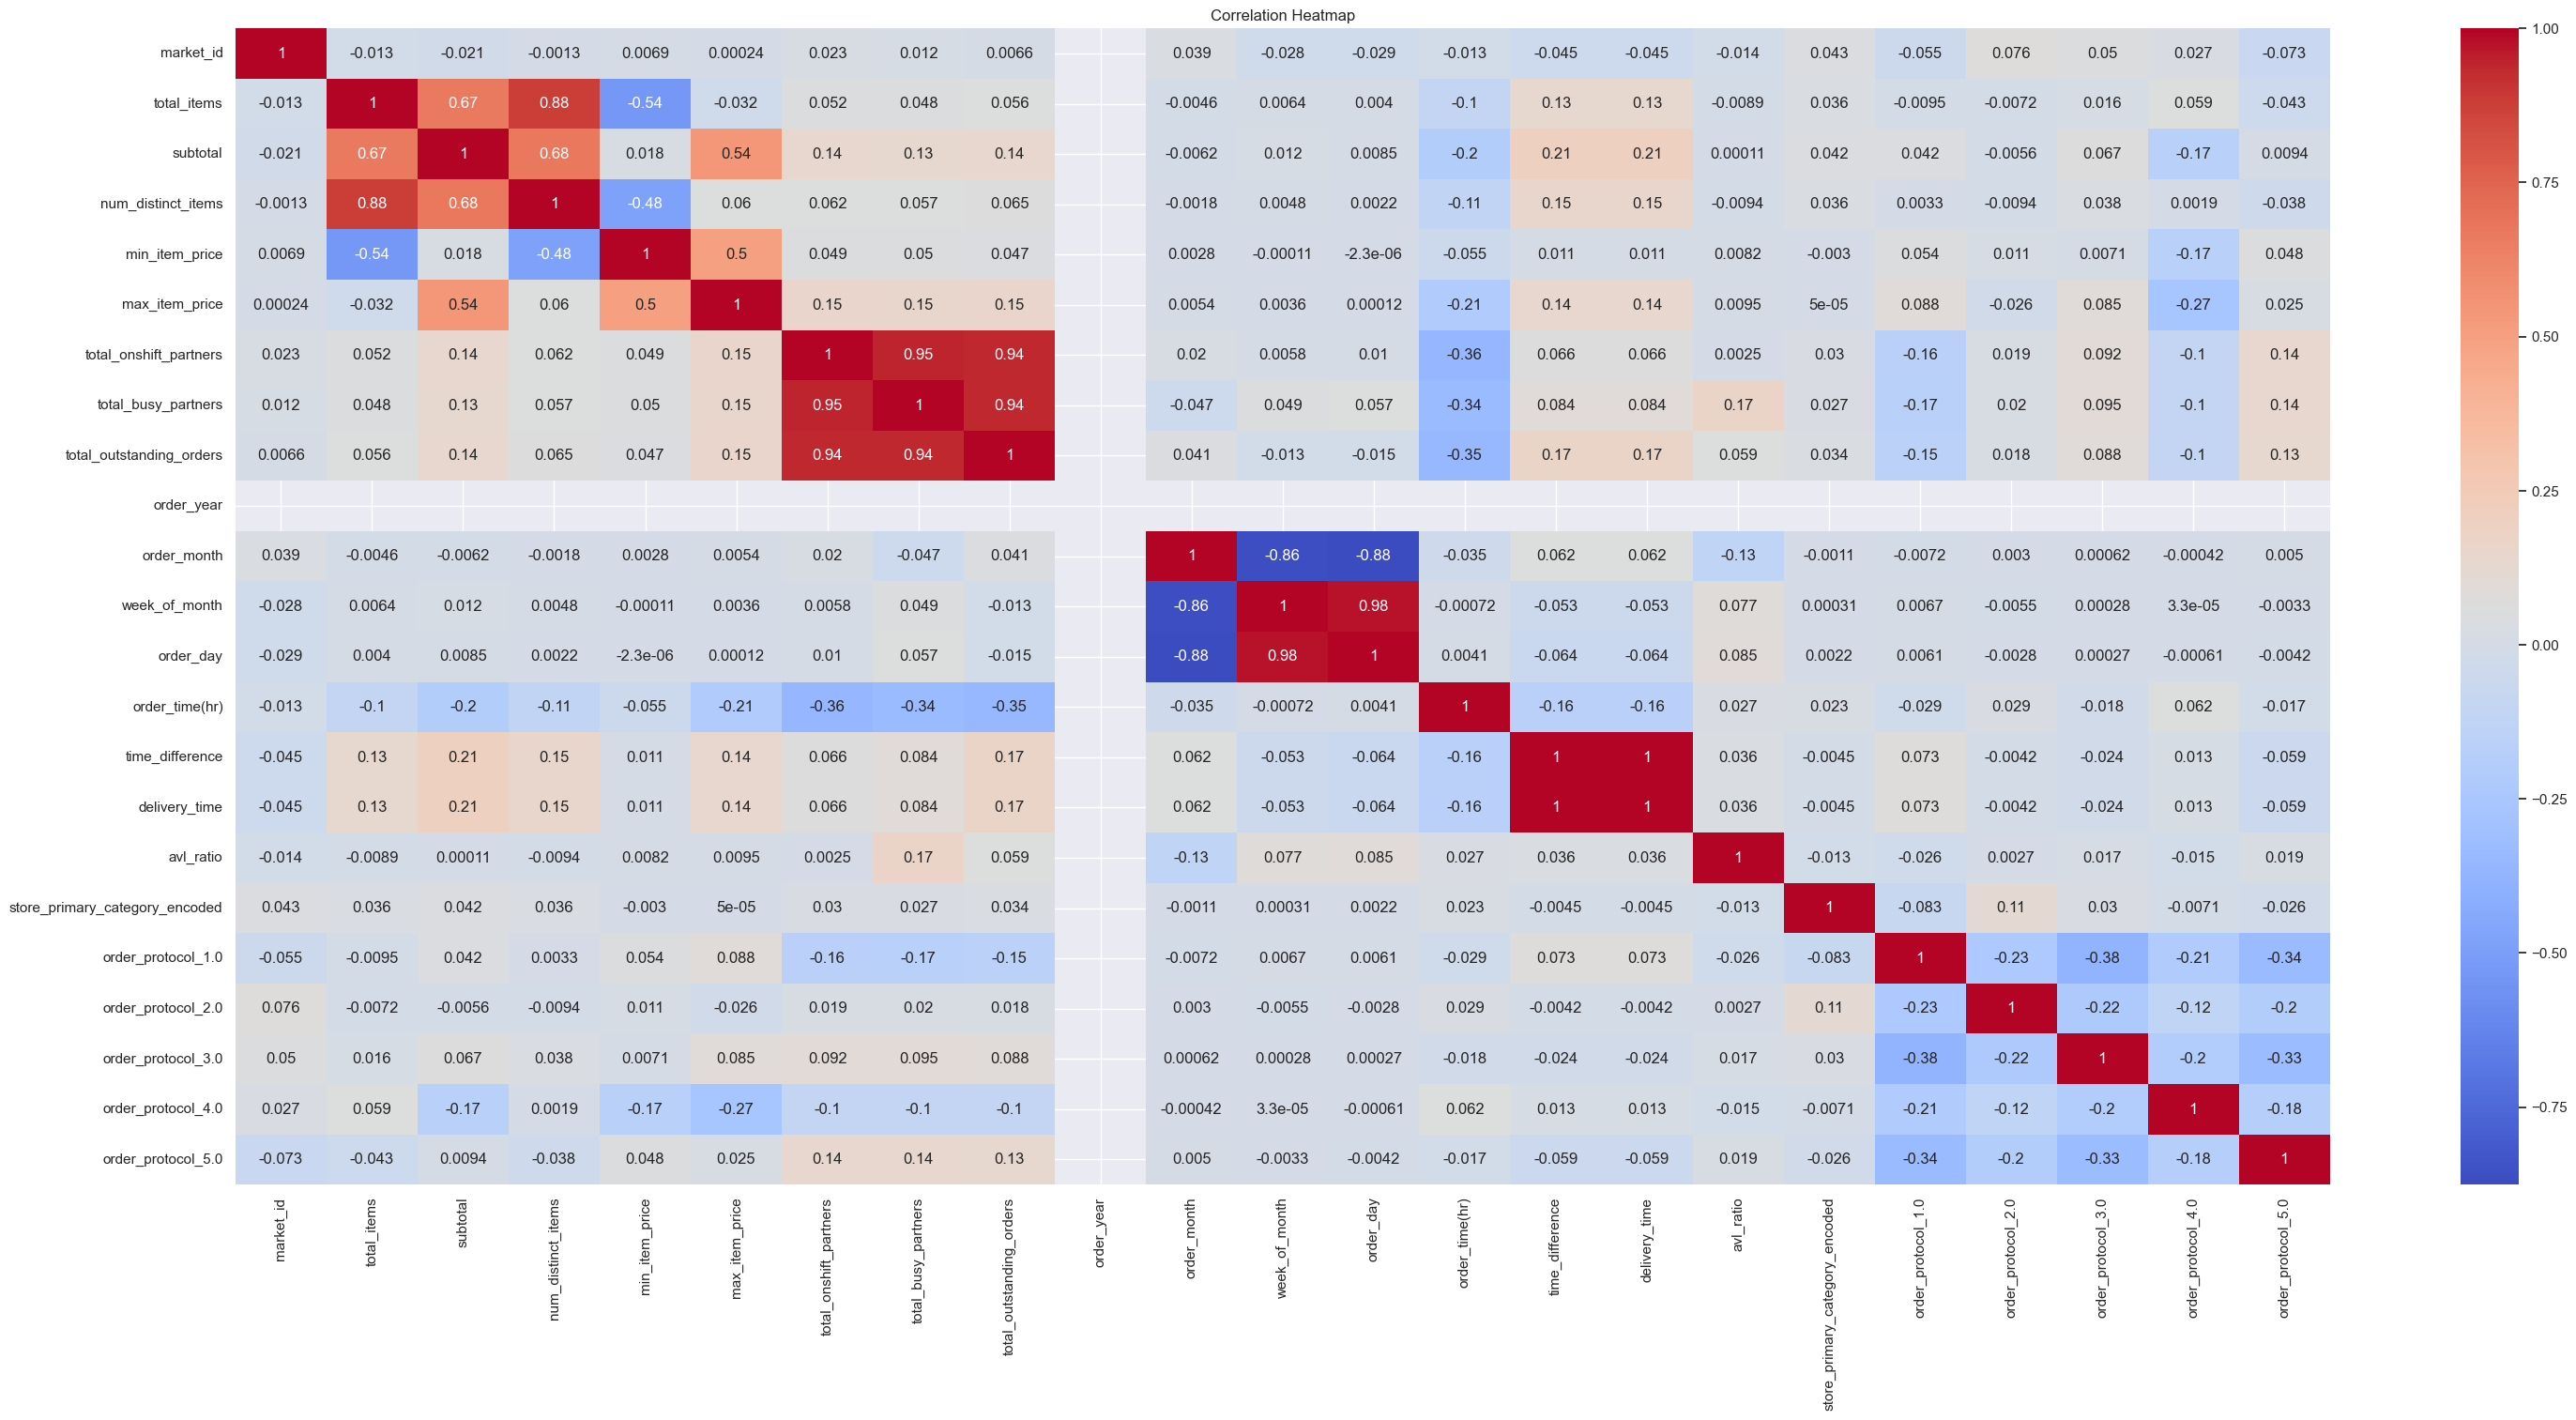

In [86]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(36, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [87]:
# Pearson and Spearman correlation coefficients between numerical features (e.g., total_items, subtotal, min_item_price, max_item_price)

In [88]:
 df2[['min_item_price','max_item_price','total_onshift_partners','order_day','order_time(hr)','total_items','market_id','subtotal']].corr()

,min_item_price,max_item_price,total_onshift_partners,order_day,order_time(hr),total_items,market_id,subtotal
min_item_price,1.000000,0.498312,0.049260,-0.000002,-0.054855,-0.535049,0.006945,0.018322
max_item_price,0.498312,1.000000,0.152670,0.000123,-0.209431,-0.032298,0.000236,0.539764
total_onshift_partners,0.049260,0.152670,1.000000,0.010146,-0.359675,0.052363,0.023015,0.136582
order_day,-0.000002,0.000123,0.010146,1.000000,0.004113,0.004005,-0.029140,0.008475
order_time(hr),-0.054855,-0.209431,-0.359675,0.004113,1.000000,-0.102639,-0.012587,-0.198205
total_items,-0.535049,-0.032298,0.052363,0.004005,-0.102639,1.000000,-0.012802,0.666863
market_id,0.006945,0.000236,0.023015,-0.029140,-0.012587,-0.012802,1.000000,-0.021360
subtotal,0.018322,0.539764,0.136582,0.008475,-0.198205,0.666863,-0.021360,1.000000


In [89]:
 df2[['min_item_price','max_item_price','total_onshift_partners','order_day','order_time(hr)','total_items','market_id','subtotal']].corr(method='spearman')

,min_item_price,max_item_price,total_onshift_partners,order_day,order_time(hr),total_items,market_id,subtotal
min_item_price,1.000000,0.432541,0.056182,0.000193,-0.033421,-0.590709,0.001072,0.029426
max_item_price,0.432541,1.000000,0.162163,0.000452,-0.188874,-0.007392,0.000928,0.592203
total_onshift_partners,0.056182,0.162163,1.000000,0.017003,-0.288640,0.052059,0.089412,0.156588
order_day,0.000193,0.000452,0.017003,1.000000,0.002453,0.002902,-0.023330,0.006276
order_time(hr),-0.033421,-0.188874,-0.288640,0.002453,1.000000,-0.129986,-0.004357,-0.233432
total_items,-0.590709,-0.007392,0.052059,0.002902,-0.129986,1.000000,-0.013540,0.662801
market_id,0.001072,0.000928,0.089412,-0.023330,-0.004357,-0.013540,1.000000,-0.018692
subtotal,0.029426,0.592203,0.156588,0.006276,-0.233432,0.662801,-0.018692,1.000000


In [90]:
# multiple factors (e.g., market_id, store_primary_category, order_protocol) together influence the subtotal or delivery time

In [91]:
df2[['order_protocol_1.0','order_protocol_2.0','order_protocol_3.0','order_protocol_4.0','order_protocol_5.0','market_id','store_primary_category_encoded','subtotal','delivery_time']].corr(method='spearman')

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,market_id,store_primary_category_encoded,subtotal,delivery_time
order_protocol_1.0,1.000000,-0.232001,-0.382051,-0.209178,-0.340294,-0.060940,-0.111907,0.058664,0.082483
order_protocol_2.0,-0.232001,1.000000,-0.224809,-0.123086,-0.200238,0.076780,0.128463,-0.007521,-0.004135
order_protocol_3.0,-0.382051,-0.224809,1.000000,-0.202693,-0.329745,0.053187,0.018315,0.070505,-0.017377
order_protocol_4.0,-0.209178,-0.123086,-0.202693,1.000000,-0.180540,0.023378,0.025248,-0.208315,-0.001807
order_protocol_5.0,-0.340294,-0.200238,-0.329745,-0.180540,1.000000,-0.067185,-0.016876,0.017145,-0.065751
market_id,-0.060940,0.076780,0.053187,0.023378,-0.067185,1.000000,0.061976,-0.018692,-0.043585
store_primary_category_encoded,-0.111907,0.128463,0.018315,0.025248,-0.016876,0.061976,1.000000,0.008824,-0.009124
subtotal,0.058664,-0.007521,0.070505,-0.208315,0.017145,-0.018692,0.008824,1.000000,0.237383
delivery_time,0.082483,-0.004135,-0.017377,-0.001807,-0.065751,-0.043585,-0.009124,0.237383,1.000000


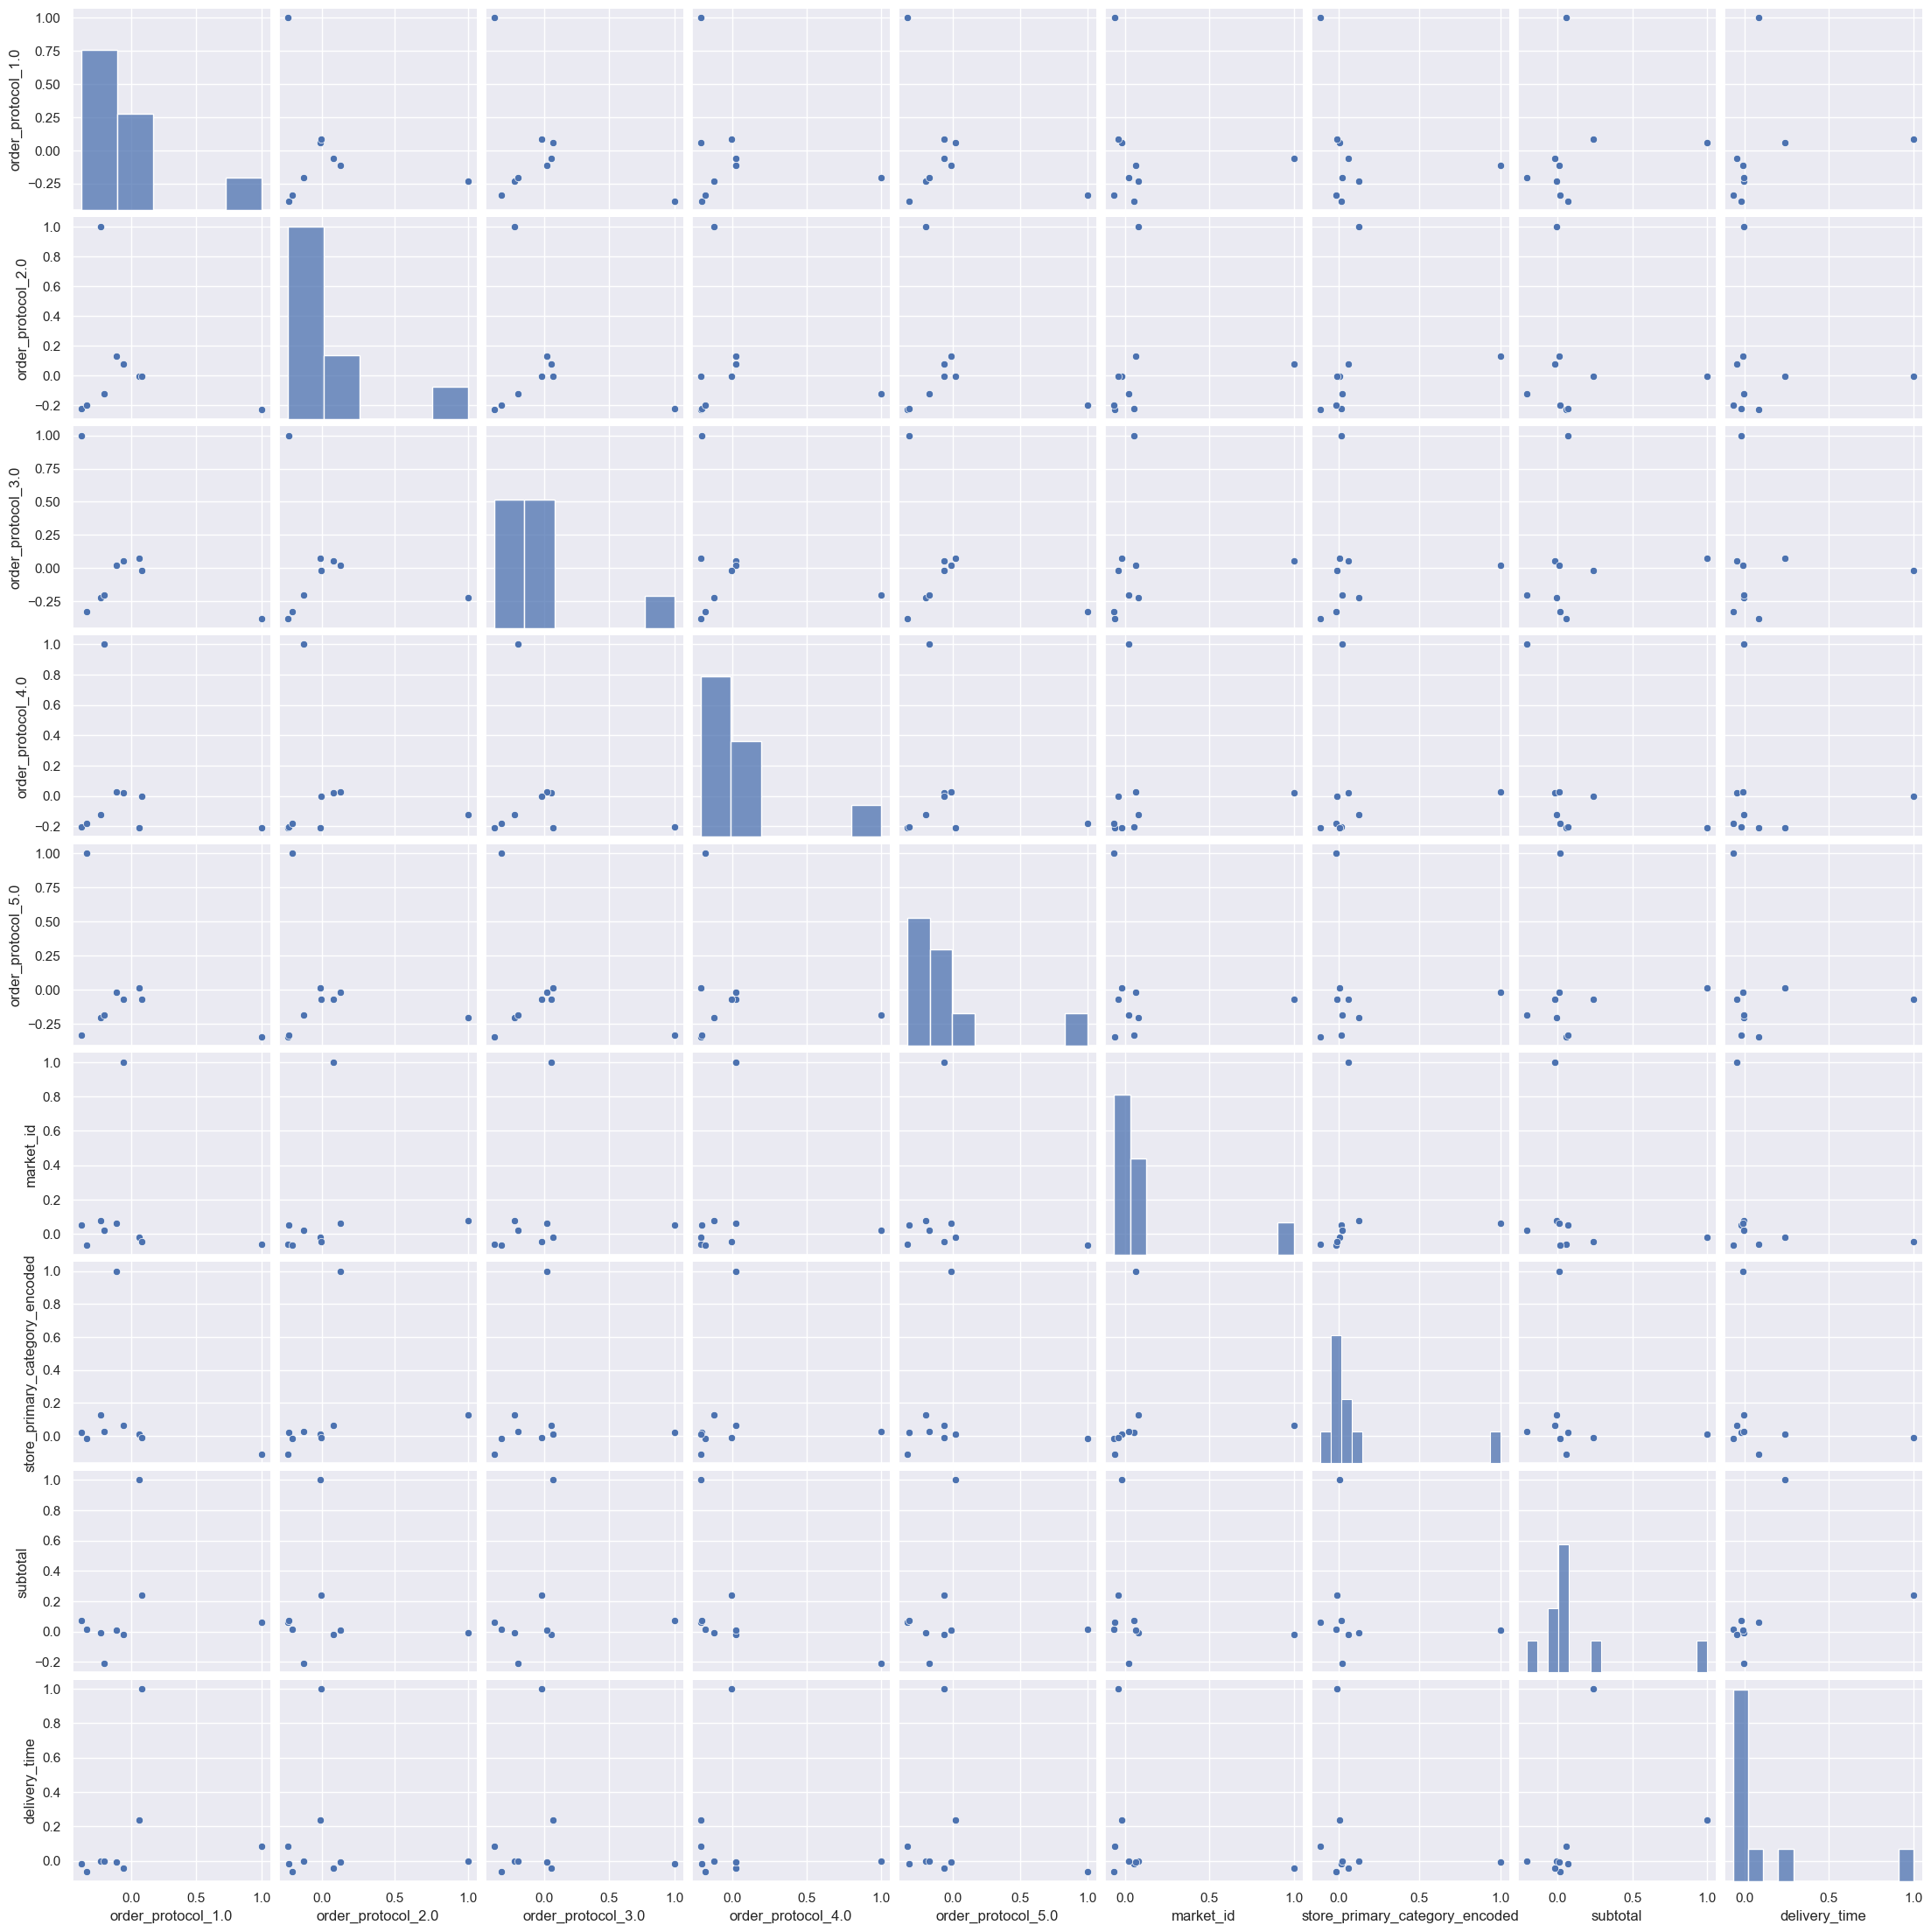

In [92]:
sns.pairplot(df2[['order_protocol_1.0','order_protocol_2.0','order_protocol_3.0','order_protocol_4.0','order_protocol_5.0','market_id','store_primary_category_encoded','subtotal','delivery_time']].corr(method='spearman'))
plt.show()

In [93]:
# Interactions between categorical variables (e.g., store_primary_category * order_protocol) affect the delivery time

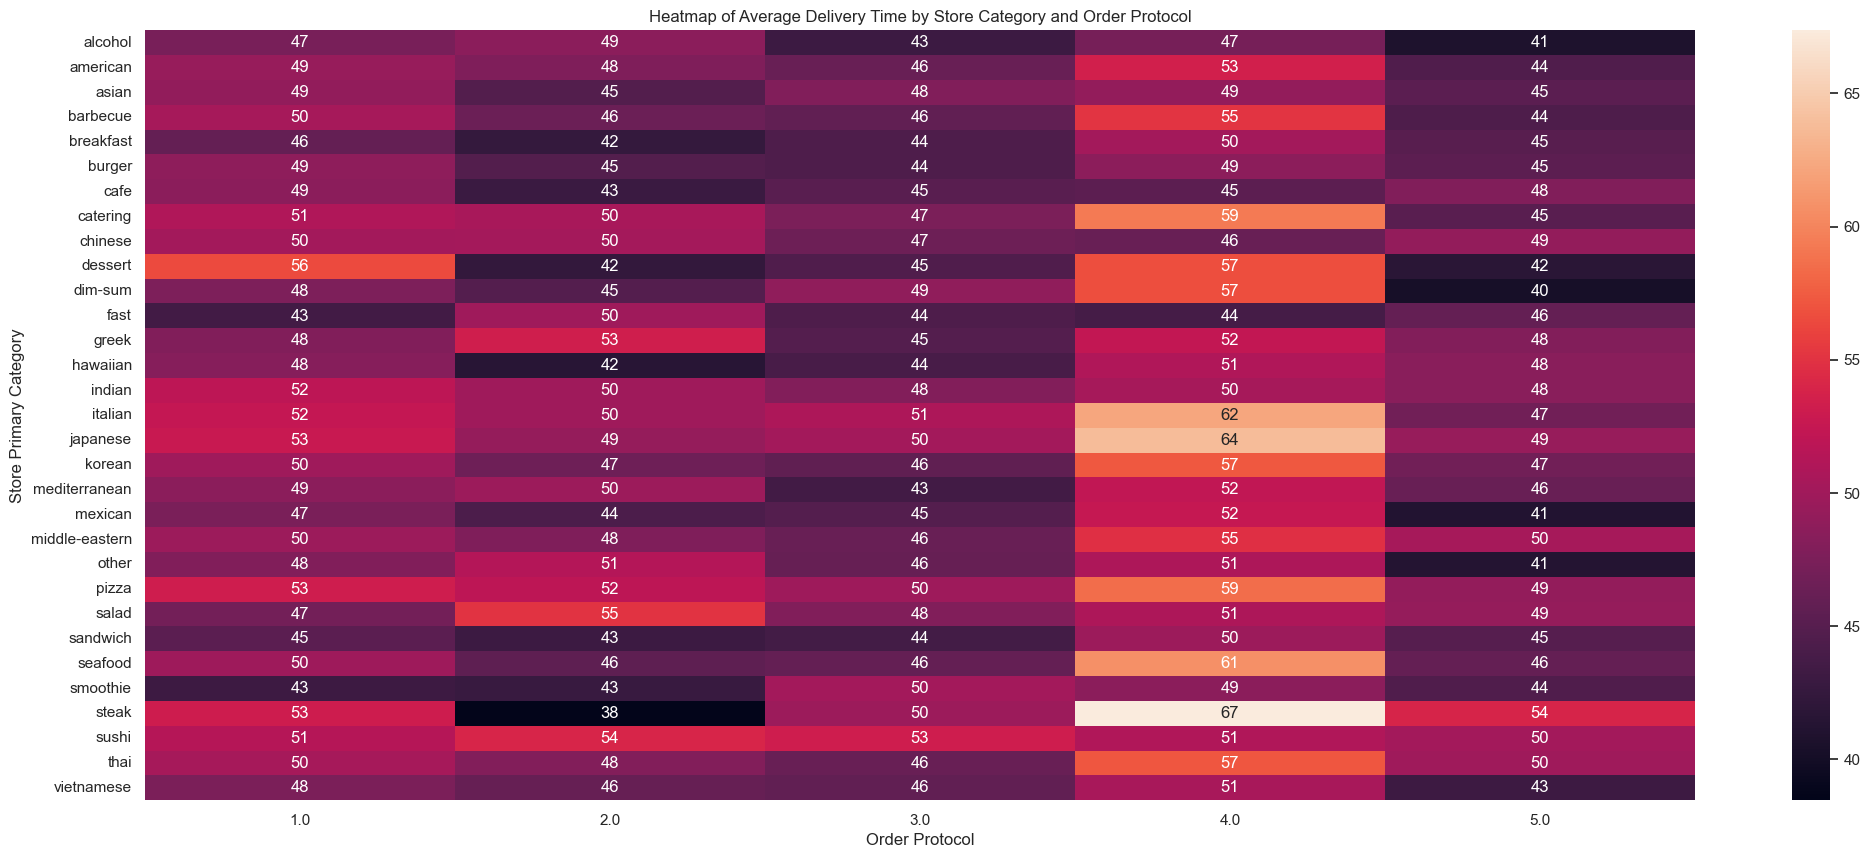

In [94]:

 pivot_table = df2.pivot_table(
    values='delivery_time',
    index='store_primary_category',
    columns='order_protocol',
    aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(25,10))
sns.heatmap(pivot_table, annot=True)
plt.title('Heatmap of Average Delivery Time by Store Category and Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Store Primary Category')
plt.show()




# we see that order_protocol 5.0 takes less average time as compared to other protocol in the top categories restaurant.
# And order_protocol 4.0 takes higher average time as compared to other protocol in the top categories restaurant.

In [95]:
df2.groupby('order_protocol')['delivery_time'].mean()

order_protocol
1.0    49.845198
2.0    47.379327
3.0    46.839577
4.0    48.328270
5.0    45.491851
Name: delivery_time, dtype: float64

# Statistical Tests

We use Annova Method

In [ ]:
# Perform ANOVA for restaurant categories

In [ ]:
ano1 = smf.ols('delivery_time~store_primary_category', data=df2).fit()
One = sm.stats.anova_lm(ano1, typ=2)


In [ ]:
One


# Since p-value is less than 0.05 , it indicates significant differences in delivery times between different restaurant categories.

In [ ]:
ano2 = smf.ols('delivery_time~order_protocol', data=df2).fit()
Two = sm.stats.anova_lm(ano2, typ=2)

In [ ]:
Two

# Since p-value is Greater than 0.05 , it indicates that there is no significant differences in delivery times between different order_protocol.

Interaction Effect

In [ ]:
ano3 = smf.ols('delivery_time~order_protocol+store_primary_category+order_protocol*store_primary_category', data=df2).fit()
Int = sm.stats.anova_lm(ano3, typ=2)

In [ ]:
Int

# Since p-value is less than 0.05 , it indicates significant differences in delivery times between different restaurant categories and order_protocol

# Insights 

In [ ]:
# we observe that from 12:00 a.m to 5:00 a.m ,higher number of order were placed and delivered
# -- Least orders placed between 6:00 a.m to 15:00 p.m
# -- Most orders placed in between Saturday and Sunday
# -- Least orders placed between Tuesday and Wednesday

  #  most of the delivery partners are available in the early morning
  #  higher subtotal items are associated with Higher maximum prices
  
  #  higher numbers of items are associated with lower minimum prices
  #  Higher subtotal amount hold higher number of items 
    
   # Top categories Restaurant recieves higher orders from order_protocol_1.0

    # Top categories Restaurant recieves less orders from order_protocol_2.0
    # maximum orders recieve from order_protocol_4.0 holds lower subtotal amount.

   # More subtotal_amount takes more time to deilver the items as it contains maximum number of items.

  # we observe that order_protocol 5.0 takes less average time as compared to other protocol in the top categories restaurant.
 # And order_protocol 4.0 takes higher average time as compared to other protocol in the top categories restaurant.

# Recommendations

In [ ]:
# Minimise the delivery time of the orders recieve from order_protocol_4.0.
# Use protocol_5.0 in the early morning between (12:00 a.m to 4:a.m) as most orders are placed with higher quantity so as to reduce delivery time.
# higher numbers of items holds higher subtotal value usually takes more time to delivered which can be improved by transport method.

# Always recommended to give priorities to the higher subtotal value items as it consist of Higher maximum prices items.

# Also try to optimise the delivery_time of order protocol 1.0 as Top categories Restaurant recieves higher orders from this protocol which usually takes more time to deliverd 
